# <span style="color: #dc322f; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; font-size:140%; background-color: #fadb8c;"> Loan Repayment Prediction</span>

<img src="https://miro.medium.com/v2/resize:fit:1400/0*8YE6hEXyYBjF5bei.jpg" alt="Loan Prediction">

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
<ol>
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Notebook Objective:</mark></b>
    This project leverages machine learning and deep neural networks to predict the probability of borrowers successfully repaying their loans. 🎯 Accurate loan repayment predictions are crucial for financial institutions to make informed lending decisions, reduce risks, and promote responsible lending practices.
    </ol>
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Project Overview</mark></b>
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Exploratory Data Analysis (EDA) 🔍</mark></b>: We start by diving into the data to uncover patterns and insights, ensuring a strong foundation for our models.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Data Preprocessing 🛠️</mark></b>: Utilizing the best preprocessing techniques, we clean and prepare the data to enhance model performance.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Machine Learning Models 🤖</mark></b>: We apply various ML models to find the most effective ones for our prediction task.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Artificial Neural Networks (ANN) 🧠</mark></b>: Finally, we deploy ANN to achieve higher accuracy in predictions.</li>
    </ol>
    By following these steps, we aim to develop a robust predictive model that will help financial institutions make better lending decisions and foster a healthier financial environment. 🌟
</div>


<a id="table of content"></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; font-size:120%; background-color: #fadb8c;"> Table of Content</span>

<a id="contents_tabel"></a>   

* [1- Importing Libraries📚](#1)
    
* [2- Loading the Dataset📊](#2)
    
* [3- Dataset Overview🔍](#3)
    
* [4- EDA📊](#4)

    * [4-1- Univariate Analysis📊](#5)
    
    * [4-2- Multivariate Analysis📊](#6)
    
* [5- Preprocessing🛠️](#7)

    * [5-1- Transforming skewed features🔄](#8)
    
    * [5-2- Label Encoding🔤](#9)
    
    * [5-3- Train Test Split 🚂🛤️](#10)
    
    * [5-4- Outlier Detection 🚨](#11)
    
    * [5-5- Scaling📏](#12)
    
    * [5-6- Handling Imbalanced label⚖️](#13)
    
* [6- ML Models⚡](#14) 

    * [6-1- Evaluation Function📊](#15)
    
    * [6-2- Logistic Regression🎯](#16)
    
    * [6-3- KNN🎯](#17)
    
    * [6-4- Naive Bayes🎯](#18)
    
    * [6-5- Support Vector Machine🎯](#19)
    
    * [6-6- Random Forest🌲](#20)
    
    * [6-7- XGBoost🚀](#21)
    
    * [6-8- LightGBM🚀](#22)
    
    * [6-9- CatBoost🚀](#23)
    
* [7- Conclusion of ML models⚡](#24)

* [8- Ensemble ML Models ⚡](#25)
    
    * [8-1- Stacking Classifier Overview🎯](#26)
    
* [9- ANN Model🧠](#27)

    * [9-1- Architecture🛠️](#28)
    
    * [9-2- Training Function🛠️](#29)
    
    * [9-3- Option1🎯](#30)
    
    * [9-4- Option2🎯](#31)
    
* [10- Conclusion📈](#32)

<a id='1'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Importing Libraries📚</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
!pip install imbalanced-learn
!pip install catboost
!pip install optuna

import numpy as np
import pandas as pd
from scipy.stats import trim_mean, kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

import optuna

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report, roc_curve, auc)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import F1Score

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

import warnings


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.6 MB/s eta 0:00:00


<a id='2'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Loading the Dataset📊</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
!gdown --id 10jgcDMUctzwuqqTwAjBP96wagtRrNmaN

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10jgcDMUctzwuqqTwAjBP96wagtRrNmaN
To: /content/loan_data.csv
100% 751k/751k [00:00<00:00, 140MB/s]


In [3]:
data = pd.read_csv('loan_data.csv')

<a id='3'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Dataset Overview🔍</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
<ol>
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Data Description</mark>📊</b>
</ol>
    The dataset used in this project was obtained from Lending Club and comprises the following attributes from <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">loan_data.csv</mark></b>:
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">credit.policy</mark></b>: A binary variable indicating whether the customer meets LendingClub.com's credit underwriting criteria (1 for meeting the criteria, 0 otherwise).</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">purpose</mark></b>: The purpose of the loan, with values such as "credit_card," "debt_consolidation," "educational," "major_purchase," "small_business," and "all_other."</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">int.rate</mark></b>: The interest rate of the loan, represented as a proportion (e.g., 0.11 for 11%).</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">installment</mark></b>: The monthly installment amount owed by the borrower if the loan is funded.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">log.annual.inc</mark></b>: The natural log of the self-reported annual income of the borrower.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">dti</mark></b>: The debt-to-income ratio of the borrower, calculated as the amount of debt divided by annual income.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">fico</mark></b>: The FICO credit score of the borrower.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">days.with.cr.line</mark></b>: The number of days the borrower has had a credit line.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">revol.bal</mark></b>: The borrower's revolving balance, representing the amount unpaid at the end of the credit card billing cycle.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">revol.util</mark></b>: The borrower's revolving line utilization rate, indicating the amount of the credit line used relative to the total credit available.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">inq.last.6mths</mark></b>: The number of inquiries by creditors made on the borrower's credit history in the last 6 months.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">delinq.2yrs</mark></b>: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">pub.rec</mark></b>: The number of derogatory public records, including bankruptcy filings, tax liens, or judgments.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Not.fully.paid</mark></b>: The dependent variable, where "0" indicates that the loan was fully paid by borrowers, and "1" indicates that it was not fully paid.</li>
    </ol>
    By understanding these variables, we can better analyze the data and build models to predict loan repayment success. 🧠💡
</div>


In [4]:
print("Few rows of the dataset:")
data.head()

Few rows of the dataset:


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    In this dataset, since <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">credit.policy</mark></b> and <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">not.fully.paid</mark></b> are categorical variables, we temporarily convert them to objects. This allows for a clear separation between numeric and nominal features, facilitating more efficient data processing and analysis.
</div>


In [5]:
# Convert 'credit.policy' and 'not.fully.paid' to categorical with 'Yes' and 'No'
data['credit.policy'] = data['credit.policy'].map({1: 'Yes', 0: 'No'})
data['not.fully.paid'] = data['not.fully.paid'].map({1: 'Yes', 0: 'No'})

In [6]:
print(f'The Shape of Dataset:\nNumber of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

The Shape of Dataset:
Number of rows: 9578
Number of columns: 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   object 
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   object 
dtypes: float64(6), int64(5), object(3)
memory usage: 1.0+ MB


In [8]:
print(f'Null values in each column:\n{data.isnull().sum()}')

Null values in each column:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    To ensure the data is clean and ready for analysis, I checked for null values in each column. Fortunately, there are no missing values in this dataset.
    This absence of null values simplifies our preprocessing steps, allowing us to focus on feature engineering and model building. ✅📊
</div>

In [9]:
print("\nSummary statistics for numerical features:")
data.describe().T


Summary statistics for numerical features:


,count,mean,std,min,25%,50%,75%,max
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01
delinq.2yrs,9578.0,0.163708,0.546215,0.000000,0.000000,0.000000,0.000000,1.300000e+01


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights from the Summary Statistics</mark></b>
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Interest Rate (`int.rate`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 12.26%</li>
                <li><b>Range</b>: 6.00% to 21.64%</li>
                <li><b>Insights</b>: The interest rates vary significantly, suggesting a wide range of borrower risk profiles. The majority of loans have interest rates between 10.39% and 14.07% (25th to 75th percentile).</li>
            </ul>
        </li>
    <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Installment:</mark></b>:
            <ul>
                <li><b>Mean</b>: $319.09</li>
                <li><b>Range</b>: 15.67 to 940.14</li>
                <li><b>Insights</b>: Monthly installments also vary widely, reflecting the diversity in loan amounts and terms..</li>
            </ul>
        </li>
    <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Log of Annual Income (`log.annual.inc`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 10.93 (approximately 55,000 when converted back from log scale)</li>
                <li><b>Range</b>: 7.55 to 14.53</li>
                <li><b>Insights</b>: Borrowers' reported incomes span a wide range, with the central tendency around 55,000. The upper 25 of borrowers report significantly higher incomes, indicating a mix of income levels among applicants.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Debt-to-Income Ratio (`dti`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 12.61</li>
                <li><b>Range</b>: 0 to 29.96</li>
                <li><b>Insights</b>: The debt-to-income ratios show a broad range, with a central tendency around 12.61, indicating varying levels of financial burden among borrowers.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">FICO Score (`fico`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 710.85</li>
                <li><b>Range</b>: 612 to 827</li>
                <li><b>Insights</b>: The average FICO score is quite high, suggesting that many borrowers have good credit. However, there are borrowers with significantly lower scores, indicating some riskier lending.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Days with Credit Line (`days.with.cr.line`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 4560.77 days (~12.5 years)</li>
                <li><b>Range</b>: ~179 days to ~48.3 years</li>
                <li><b>Insights</b>: Borrowers have had credit lines for varying lengths of time, with a median around 11.4 years. This suggests a mix of both newer and more established credit users.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Revolving Balance (`revol.bal`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 16,913.96</li>
                <li><b>Range</b>: 0 to 1,207,359</li>
                <li><b>Insights</b>: The revolving balances are highly variable, with some borrowers having extremely high balances, which could indicate higher financial risk.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Revolving Utilization Rate (`revol.util`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 46.80%</li>
                <li><b>Range</b>: 0% to 119%</li>
                <li><b>Insights</b>: The utilization rates indicate how much of their credit lines borrowers are using. A mean of 46.80% is moderate, but the high maximum suggests some borrowers are over-leveraged.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Inquiries in the Last 6 Months (`inq.last.6mths`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 1.58</li>
                <li><b>Range</b>: 0 to 33</li>
                <li><b>Insights</b>: Most borrowers have few recent credit inquiries, but a small number have a very high number of inquiries, which can be a red flag for lenders.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Delinquencies in the Last 2 Years (`delinq.2yrs`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 0.16</li>
                <li><b>Range</b>: 0 to 13</li>
                <li><b>Insights</b>: Most borrowers have no recent delinquencies, but some have a significant number, indicating varying levels of creditworthiness.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Public Records (`pub.rec`)</mark></b>:
            <ul>
                <li><b>Mean</b>: 0.06</li>
                <li><b>Range</b>: 0 to 5</li>
                <li><b>Insights</b>: Public records are rare, but their presence can indicate serious credit issues such as bankruptcies or tax liens.</li>
            </ul>
        </li>
    </ol>
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Conclusion</mark></b>
    The dataset shows a diverse borrower profile with varying levels of income, debt, credit history, and financial behavior. These insights can guide the preprocessing steps and the choice of models for predicting loan repayment. Key areas of focus might include handling the high variance in financial metrics and addressing the outliers in credit inquiries, revolving balance, and public records. 📊💡
</div>


In [10]:
print("\nSummary statistics for categorical features:")
data.describe(include='O')


Summary statistics for categorical features:


,credit.policy,purpose,not.fully.paid
count,9578,9578,9578
unique,2,7,2
top,Yes,debt_consolidation,No
freq,7710,3957,8045


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights from the Summary Statistics of Categorical Features</mark></b>
    <ul>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Credit Policy</mark></b>: The data shows that a large portion of borrowers meet the lending criteria, indicating a relatively low-risk pool of borrowers according to LendingClub's standards.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Loan Purpose</mark></b>: Debt consolidation is the predominant reason for borrowing, highlighting a common financial strategy among borrowers to manage multiple debts.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Loan Repayment</mark></b>: Most loans are fully repaid, which is encouraging for both lenders and borrowers, as it indicates a high level of financial responsibility and successful loan structuring.</li>
    </ul>
    These insights help in understanding the borrower demographics and their behavior, which is crucial for designing and improving predictive models for loan repayment. 📊💡
</div>


In [11]:
print(f'Unique values in each column:\n{data.nunique()}')

Unique values in each column:
credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64


In [12]:
data.duplicated().sum()

0

<a id='4'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> EDA 📊</span>

<a id='5'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Univariate Analysis 📊</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [13]:
num_columns = data.select_dtypes(include=['number']).columns

# Calculate mean and trimmed mean for each numeric columns
mean_vs_trimmed_mean = pd.DataFrame({'mean': data[num_columns].mean(),
                                     'trimmed_mean': data[num_columns].apply(lambda x: trim_mean(x, proportiontocut=0.1))})

# Calculate kurtosis and skewness for each numeric columns
kurtosis_skewness = pd.DataFrame({'kurtosis': data[num_columns].apply(kurtosis),
                                  'skewness': data[num_columns].apply(skew)})

print("Mean vs Trimmed Mean:")
print(mean_vs_trimmed_mean)
print('================================================================')
print("\nKurtosis and Skewness:")
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                           mean  trimmed_mean
int.rate               0.122640      0.122229
installment          319.089413    295.638150
log.annual.inc        10.932117     10.931770
dti                   12.606679     12.594376
fico                 710.846314    708.595772
days.with.cr.line   4560.767197   4303.643088
revol.bal          16913.963876  10809.191153
revol.util            46.799236     46.499530
inq.last.6mths         1.577469      1.163622
delinq.2yrs            0.163708      0.021268
pub.rec                0.062122      0.000000

Kurtosis and Skewness:
                     kurtosis   skewness
int.rate            -0.224833   0.164394
installment          0.137209   0.912380
log.annual.inc       1.607538   0.028664
dti                 -0.900512   0.023937
fico                -0.422718   0.471186
days.with.cr.line    1.936223   1.155567
revol.bal          259.519049  11.159310
revol.util          -1.116511   0.059976
inq.last.6mths      26.273784   3

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights</mark></b>
    The comparison between the mean and the trimmed mean provides insights into the presence of outliers in the data. A trimmed mean is calculated by excluding the extreme values (outliers), offering a more robust measure of central tendency.
    <br>
    Kurtosis and skewness help in understanding the distribution shape and the presence of outliers.
    <ul>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Outliers</mark></b>: Several features, especially <code>revol.bal</code>, <code>inq.last.6mths</code>, <code>delinq.2yrs</code>, and <code>pub.rec</code>, have significant outliers, affecting their distributions and means.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Distribution Shape</mark></b>: Most features have distributions close to normal, but some, like <code>revol.bal</code> and <code>delinq.2yrs</code>, are heavily skewed and leptokurtic.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Data Preprocessing</mark></b>: These insights highlight the need for careful handling of outliers and possible transformations to normalize distributions for better model performance.</li>
    </ul>
    These insights will guide data preprocessing steps, such as outlier treatment and feature scaling, ensuring robust and accurate predictive models. 🚀📊
</div>

In [14]:
# visualization style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [15]:
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Percentage of each unique value in column '{col}':")
    value_counts = data[col].value_counts(normalize=True) * 100
    value_counts = value_counts.round(2).astype(str) + '%'
    print(value_counts)
    print("============================================================")
    print()

Percentage of each unique value in column 'credit.policy':
credit.policy
Yes    80.5%
No     19.5%
Name: proportion, dtype: object

Percentage of each unique value in column 'purpose':
purpose
debt_consolidation    41.31%
all_other             24.34%
credit_card           13.18%
home_improvement       6.57%
small_business         6.46%
major_purchase         4.56%
educational            3.58%
Name: proportion, dtype: object

Percentage of each unique value in column 'not.fully.paid':
not.fully.paid
No     83.99%
Yes    16.01%
Name: proportion, dtype: object



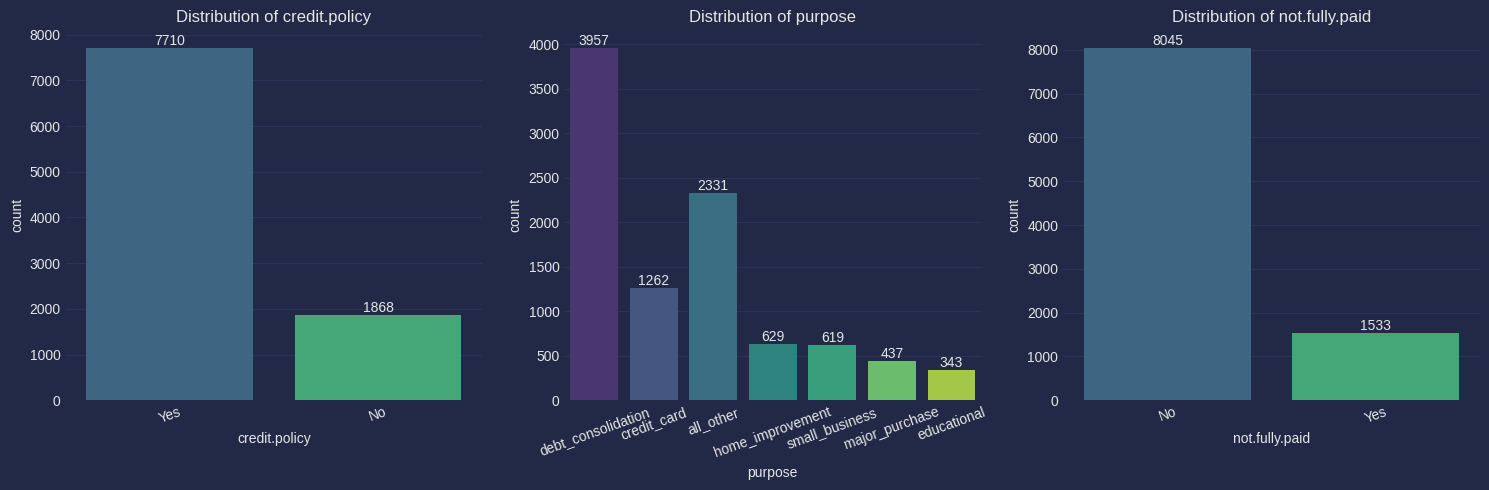

In [16]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights from Categorical Information</mark></b>
    <ul>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Credit Policy</mark></b>: The high percentage of borrowers meeting credit policy criteria indicates a conservative approach to lending, focusing on lower-risk individuals.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Loan Purpose</mark></b>: Debt consolidation is the primary reason for borrowing, reflecting a common need to manage existing debts. This is followed by general expenses and credit card debt, suggesting varied financial needs among borrowers.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Loan Repayment</mark></b> (<code>not.fully.paid</code>): The majority of loans (83.99%) are fully repaid, indicating a strong repayment performance among borrowers. Only 16.01% of loans are not fully repaid, suggesting a relatively low default rate. This positive repayment trend is encouraging for financial institutions, as it implies lower risks and higher reliability in their borrower base.</li>
    </ul>
    These insights provide a clear understanding of borrower characteristics and behavior, which can inform lending strategies and risk management practices. 📊💼
</div>


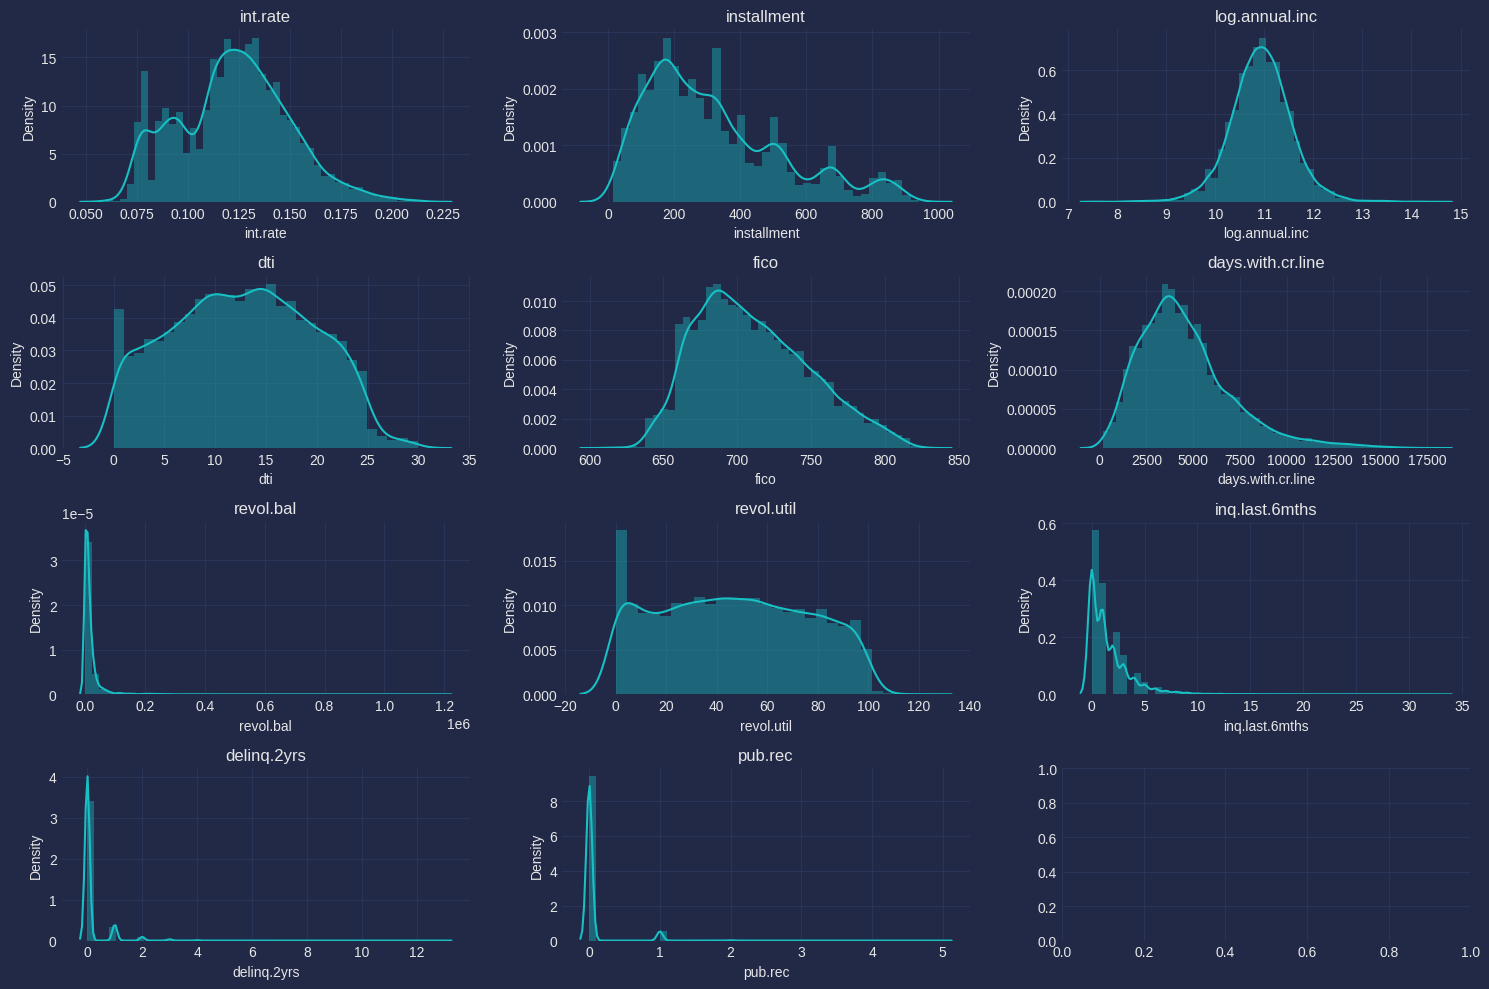

In [17]:
# filter warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(4, 3, figsize=(15,10))

index = 0
axs = axs.flatten()
for index, col in enumerate(data.select_dtypes(include='number').columns):
  sns.distplot(data[col], ax=axs[index])
  axs[index].set_title(col)

plt.tight_layout()
plt.show()

<a id='6'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Multivariate Analysis 📊</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [18]:
# Crosstab: Relationship between 'not.fully.paid' and 'purpose' status
crosstab_1 = pd.crosstab(data['not.fully.paid'], data['purpose'], normalize = 'index')
crosstab_2 = pd.crosstab(data['purpose'], data['not.fully.paid'], normalize = 'index')

# Display the crosstab
print("Crosstab: Relationship between 'not.fully.paid' and 'purpose' status")
print(crosstab_2)
print("\n")
crosstab_1

Crosstab: Relationship between 'not.fully.paid' and 'purpose' status
not.fully.paid            No       Yes
purpose                               
all_other           0.833977  0.166023
credit_card         0.884311  0.115689
debt_consolidation  0.847612  0.152388
educational         0.798834  0.201166
home_improvement    0.829889  0.170111
major_purchase      0.887872  0.112128
small_business      0.722132  0.277868




purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
not.fully.paid,,,,,,,
No,0.241641,0.138720,0.416905,0.034058,0.064885,0.048229,0.055562
Yes,0.252446,0.095238,0.393346,0.045010,0.069798,0.031963,0.112198


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights from the Crosstab: Relationship between 'not.fully.paid' and 'purpose' Status</mark></b>
    <ol>
        <li><b>High-Risk Loan Purposes</b>:
            <ul>
                <li><b>Small Business</b>: Highest risk, with 27.79% not fully paid and a significant increase in proportion among not fully paid loans.</li>
                <li><b>Educational</b>: Second highest risk, with 20.12% not fully paid.</li>
            </ul>
        </li>
        <li><b>Moderate Risk Loan Purpose</b>:
            <ul>
                <li><b>Debt Consolidation</b>: Moderate risk, most common loan purpose but with a noticeable default rate (15.24%).</li>
            </ul>
        </li>
        <li><b>Low-Risk Loan Purposes</b>:
            <ul>
                <li><b>Credit Card</b> and <b>Major Purchase</b>: Lower risk with default rates of 11.57% and 11.21%, respectively.</li>
            </ul>
        </li>
        <li><b>Loan Distribution and Risk Management</b>:
            <ul>
                <li><b>Risk Assessment</b>: Financial institutions should closely monitor small business and educational loans due to their higher default rates.</li>
                <li><b>Lending Strategy</b>: Focus on credit card and major purchase loans for safer lending, while applying stricter criteria for small business and educational loans.</li>
            </ul>
        </li>
    </ol>
    These insights can guide lenders in adjusting their risk management strategies and loan approval processes to minimize defaults and enhance lending efficiency. 📊💡
</div>


In [19]:
def plot_countplot_with_annotations(data, x_col, hue_col):
    """
    Function to create a countplot with annotations.

    Parameters:
    - data: DataFrame containing the data
    - x_col: Column to be plotted on x-axis
    - hue_col: Column to be used for coloring (hue)

    Returns:
    - None (displays the plot)
    """
    # Plot countplot
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=x_col, hue=hue_col, data=data)

    # Add annotations
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, xytext=(0, 5),
                    textcoords='offset points')

    # Set labels and title
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.title(f'Count of not.fully.paid by {x_col} Status')

    # Show plot
    plt.show()

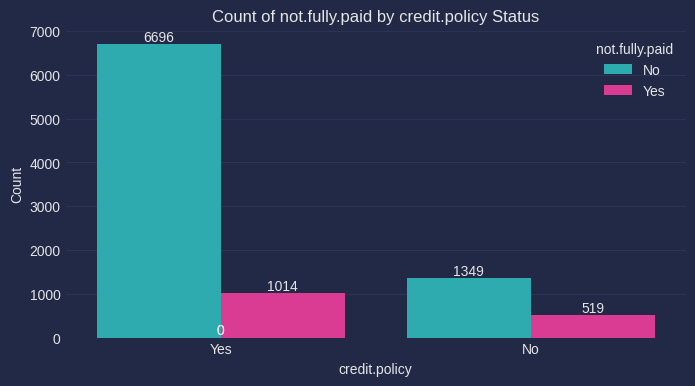

In [20]:
plot_countplot_with_annotations(data, 'credit.policy', 'not.fully.paid')

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights:</mark></b>
    <ul>
        <li>Credit Card category has the lowest proportion of loans not fully paid, at 11.57%, indicating It is less risky.</li>
        <li>A smaller percentage of not fully paid loans (9.52%) compared to fully paid loans (13.87%) indicates lower risk.</li>
    </ul>
</div>

In [21]:
# Create pivot table with trimmed mean
pivot_result = data.pivot_table(
    ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico'],
    ['not.fully.paid'],
    aggfunc = lambda x: trim_mean(x, proportiontocut=0.1),
)

print("Pivot_Table:")
pivot_result

Pivot_Table:


,dti,fico,installment,int.rate,log.annual.inc
not.fully.paid,,,,,
No,12.474149,711.214696,291.400454,0.120325,10.940846
Yes,13.232143,695.500407,318.577914,0.131917,10.881740


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights from Pivot Table</mark></b>
    <ol>
        <li><b>Debt-to-Income Ratio</b>:
            <ul>
                <li>Higher for loans not fully paid (13.23 vs. 12.47).</li>
                <li><b>Action</b>: Monitor and possibly limit high DTI loans.</li>
            </ul>
        </li>
        <li><b>FICO Score</b>:
            <ul>
                <li>Lower for loans not fully paid (695.50 vs. 711.21).</li>
                <li><b>Action</b>: Use FICO score as a key criterion for loan approval.</li>
            </ul>
        </li>
        <li><b>Installment Amount</b>:
            <ul>
                <li>Higher for loans not fully paid (318.58 vs. 291.40).</li>
                <li><b>Action</b>: Consider capping installment amounts relative to borrower income.</li>
            </ul>
        </li>
        <li><b>Interest Rate</b>:
            <ul>
                <li>Higher for loans not fully paid (13.19% vs. 12.03%).</li>
                <li><b>Action</b>: Be cautious with high-interest loans and consider offering lower rates to reduce default risk.</li>
            </ul>
        </li>
        <li><b>Annual Income</b>:
            <ul>
                <li>Slightly lower for loans not fully paid (10.88 vs. 10.94).</li>
                <li><b>Action</b>: Prioritize borrowers with higher reported incomes.</li>
            </ul>
        </li>
    </ol>
    These insights can help in refining the lending criteria and risk management strategies to minimize defaults and promote responsible lending. 📊📈
</div>


In [22]:
# Define columns for groupby
groupby_columns = ['days.with.cr.line', 'revol.bal', 'inq.last.6mths', 'delinq.2yrs']

# using groupby
groupby_result = data.groupby('not.fully.paid')[groupby_columns].agg(lambda x: trim_mean(x, 0.1))

# Display the result
print("Groupby:")
groupby_result

Groupby:


,days.with.cr.line,revol.bal,inq.last.6mths,delinq.2yrs
not.fully.paid,,,,
No,4328.790087,10620.340221,1.056082,0.018642
Yes,4174.109209,11996.185004,1.814181,0.035045


In [23]:
# using groupby
cols = ['int.rate', 'installment', 'dti', 'log.annual.inc', 'revol.bal']
groupby_result = data.groupby(['purpose', 'not.fully.paid'])[cols].agg(lambda x: trim_mean(x, 0.1))

# Display the result
print("Groupby:")
groupby_result

Groupby:


int.rate  installment        dti  \
purpose            not.fully.paid                                     
all_other          No              0.113671   214.256774  10.662012   
                   Yes             0.126808   225.592186  11.739839   
credit_card        No              0.117535   291.874609  14.143009   
                   Yes             0.130364   337.202373  14.689322   
debt_consolidation No              0.125495   342.785089  14.040522   
                   Yes             0.133233   338.609607  14.935673   
educational        No              0.116709   185.590500  10.969591   
                   Yes             0.128902   217.892281  12.050351   
home_improvement   No              0.113824   304.378278   9.630742   
                   Yes             0.128389   363.903908  10.736782   
major_purchase     No              0.111248   202.948077   9.889006   
                   Yes             0.127888   326.401463  10.086829   
small_business     No              0.134051   399.161281   9.996602   
                   Yes             0.146219   481.172174  11.907174   

                                   log.annual.inc     revol.bal  
purpose            not.fully.paid                                
all_other          No                   10.863030   6605.613111  
                   Yes                  10.770420   8879.411576  
credit_card        No                   11.053581  16126.859060  
                   Yes                  11.037695  19264.796610  
debt_consolidation No                   10.918325  12535.111773  
                   Yes                  10.833069  12744.993789  
educational        No                   10.585814   5551.822727  
                   Yes                  10.537079   6657.368421  
home_improvement   No                   11.209341   9760.260766  
                   Yes                  11.074535   9779.321839  
major_purchase     No                   10.818913   4913.910256  
                   Yes                  10.797778   5708.243902  
small_business     No                   11.129693  11581.715877  
                   Yes                  11.178623  19178.826087

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights from Groupby Analysis by Loan Purpose and Repayment Status</mark></b>
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">All Other</mark></b>:
            <ul>
                <li>Higher interest rates, installments, DTIs, and revolving balances are associated with higher default risk. Lower income also contributes to the risk.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Credit Card</mark></b>:
            <ul>
                <li>Loans not fully paid have higher interest rates, installments, DTIs, and revolving balances. The annual income difference is negligible, suggesting other factors are more critical in repayment ability.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Debt Consolidation</mark></b>:
            <ul>
                <li>Higher interest rates and DTIs are notable risk factors for debt consolidation loans. Lower income also slightly contributes to higher default risk.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Educational</mark></b>:
            <ul>
                <li>Higher interest rates, installments, DTIs, and revolving balances indicate higher default risk. Lower income also contributes to risk.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Home Improvement</mark></b>:
            <ul>
                <li>Higher interest rates, installments, and DTIs are associated with higher default risk. The income difference is minimal, but the revolving balance remains consistent.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Major Purchase</mark></b>:
            <ul>
                <li>Higher interest rates, installments, and revolving balances are associated with higher default risk. The income and DTI differences are minimal, suggesting these loans may be manageable despite the higher default rates.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Small Business</mark></b>:
            <ul>
                <li>Higher interest rates, installments, DTIs, and revolving balances are associated with higher default risk. Interestingly, the annual income is slightly higher for not fully paid loans, possibly due to the variability in small business incomes.</li>
            </ul>
        </li>
    </ol>
    These insights highlight the importance of managing interest rates, installment amounts, and revolving balances to mitigate default risks. Additionally, closely monitoring the DTI can help identify high-risk borrowers. 📊📈
</div>


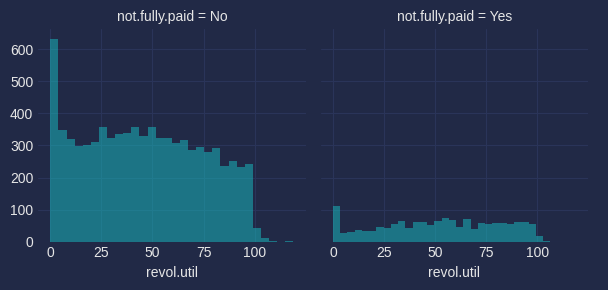

In [24]:
# Visualizing the not.fully.paid based on revol.util
warnings.filterwarnings("ignore")

v1 = sns.FacetGrid(data, col='not.fully.paid')
v1.map(plt.hist, 'revol.util', alpha=0.5, bins=30)
v1.add_legend()

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights:</mark></b>
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Distribution of Revolving Utilization Rates</mark></b>:
            <ul>
                <li>The histogram for <b>'not.fully.paid = No'</b> has significantly more data points, with the highest frequency count near the lower end of the <b>'revol.util'</b> scale.</li>
                <li>In contrast, the histogram for <b>'not.fully.paid = Yes'</b> has fewer data points and lower frequencies across the same range of revolving utilization rates.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Interpretation</mark></b>:
            <ul>
                <li>Borrowers who fully paid their loans (<b>'not.fully.paid = No'</b>) tend to have lower revolving utilization rates.</li>
                <li>Borrowers who did not fully pay their loans (<b>'not.fully.paid = Yes'</b>) exhibit a wider range of revolving utilization rates, including higher values.</li>
            </ul>
        </li>
    </ol>
</div>

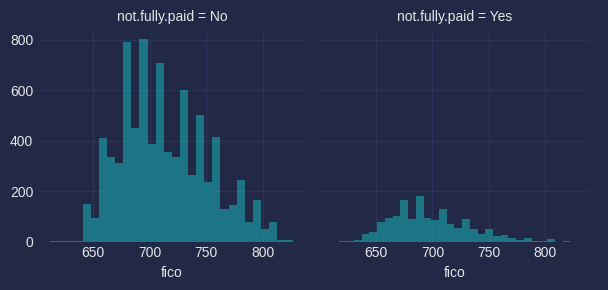

In [25]:
# Visualizing the not.fully.paid based on fico
warnings.filterwarnings("ignore")

v2 = sns.FacetGrid(data, col='not.fully.paid')
v2.map(plt.hist, 'fico', alpha=0.5, bins=30)
v2.add_legend()

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights from FICO Score Distributions for Fully Paid and Not Fully Paid Loans</mark></b>
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">FICO Score Range</mark></b>:
            <ul>
                <li><b>Fully Paid</b>: Borrowers span a broader range of FICO scores, indicating a mix of high and moderately high creditworthiness.</li>
                <li><b>Not Fully Paid</b>: Borrowers are concentrated in a narrower range of lower FICO scores, indicating generally lower creditworthiness.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Peak Concentration</mark></b>:
            <ul>
                <li><b>Fully Paid</b>: The peak is between 700 and 750, suggesting that higher FICO scores are associated with better repayment performance.</li>
                <li><b>Not Fully Paid</b>: The peak is around 670 to 700, suggesting that borrowers with scores in this range are more likely to default.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Skewness and Spread</mark></b>:
            <ul>
                <li><b>Fully Paid</b>: The slight left skew and broader spread indicate a healthy mix of high FICO scores among repaid loans.</li>
                <li><b>Not Fully Paid</b>: The left skew and narrower spread highlight a concentration of lower FICO scores, which correlates with higher default risk.</li>
            </ul>
        </li>
    </ol>
    These insights can help in better segmenting borrowers based on their creditworthiness and improving overall loan portfolio performance. 📊💡
</div>

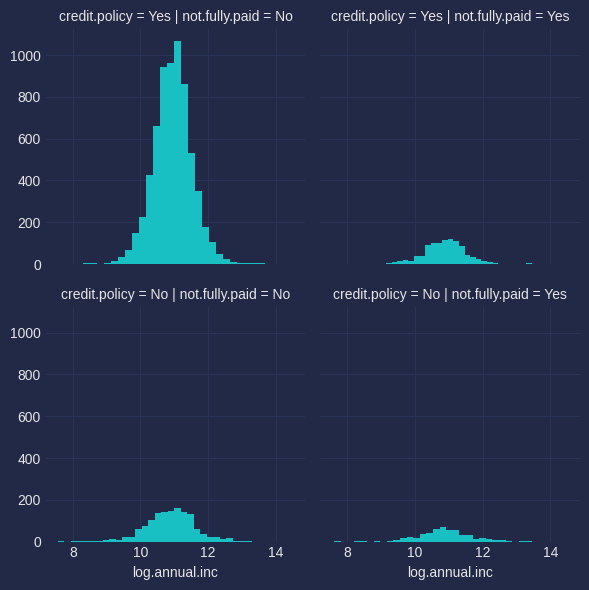

In [26]:
# Visualizing the not.fully.paid based on log.annual.inc and credit.policy

v3 = sns.FacetGrid(data, col='not.fully.paid', row='credit.policy')

v3.map(plt.hist, 'log.annual.inc', bins=30)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">insights</mark></b>:
    <ol>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">credit.policy = Yes, not.fully.paid = No</mark></b>:
            <ul>
                <li>Borrowers meeting credit policy criteria (credit.policy = Yes) tend to have a higher logarithmic annual income.</li>
                <li>Most of these borrowers fully pay off their loans (not.fully.paid = No).</li>
            </ul>
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">credit.policy = Yes, not.fully.paid = Yes</mark></b>:
            <ul>
                <li>Again, for borrowers meeting credit policy criteria (credit.policy = Yes), there's a wide range of logarithmic annual incomes.</li>
                <li>Some borrowers meeting the criteria still have loans that are not fully paid (not.fully.paid = Yes).</li>
            </ul>
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">credit.policy = No, not.fully.paid = No</mark></b>:
            <ul>
                <li>Borrowers not meeting credit policy criteria (credit.policy = No) have lower logarithmic annual incomes.</li>
                <li>Despite this, some of them manage to fully pay off their loans.</li>
            </ul>
        </li>      
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">credit.policy = No, not.fully.paid = Yes</mark></b>:
            <ul>
                <li>Borrowers not meeting credit policy criteria (credit.policy = No) also exhibit a wide range of logarithmic annual incomes.</li>
                <li>However, a significant portion of them has loans that are not fully paid.</li>
            </ul>
        </li>
    </ol>
</div>


The highest correlation between numerical features:



int.rate                       fico
installment          log.annual.inc
log.annual.inc          installment
dti                      revol.util
fico                       int.rate
days.with.cr.line    log.annual.inc
revol.bal            log.annual.inc
revol.util                     fico
inq.last.6mths             int.rate
delinq.2yrs                    fico
pub.rec                        fico
dtype: object

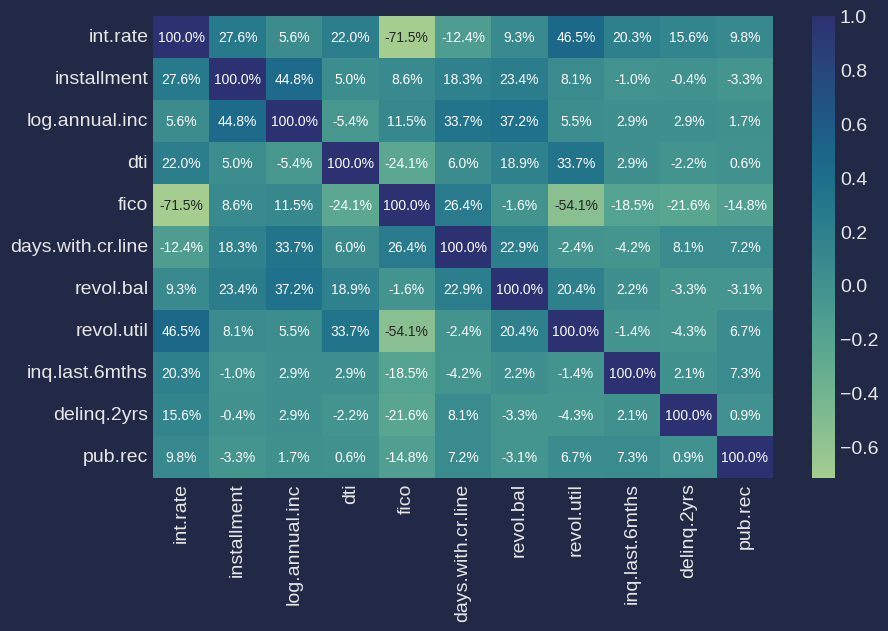

In [27]:
corr_mat = data.select_dtypes(include=['number']).corr()
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.heatmap(corr_mat, annot=True, fmt=".1%", cmap="crest")

# find the highest corr
print('The highest correlation between numerical features:\n')
for x in range(len(data.select_dtypes(include=['number']).columns)):
    corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

<a id='7'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Preprocessing🛠️ </span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">In the preprocessing step</mark></b>, we prepare the data for modeling. Based on the exploratory data analysis (EDA), we will implement the following techniques:
    <ol>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Transform Skewed Features</mark></b>: Apply transformations to reduce skewness in features, ensuring a more normal distribution.
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Label Encoding</mark></b>: Convert categorical variables into numerical formats suitable for modeling.
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Train-Test Split</mark></b>: Divide the dataset into training and testing sets to evaluate model performance.
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Outlier Handling</mark></b>: Identify and address outliers to minimize their impact on the model.
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Scaling</mark></b>: Standardize or normalize features to bring them onto a common scale.
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Handle Imbalanced Labels</mark></b>: Implement techniques like oversampling, undersampling, or using class weights to address imbalanced classes.
        </li>
    </ol>
    <p>These preprocessing steps are crucial for enhancing the model's performance and ensuring reliable predictions. 🚀</p>
</div>


<a id='8'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Transforming skewed features 🔄</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [28]:
numeric_data = data[num_columns]

# Calculate skewness of numerical features
skewness = numeric_data.apply(skew)

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
int.rate              0.164394
installment           0.912380
log.annual.inc        0.028664
dti                   0.023937
fico                  0.471186
days.with.cr.line     1.155567
revol.bal            11.159310
revol.util            0.059976
inq.last.6mths        3.583590
delinq.2yrs           6.060844
pub.rec               5.125632
dtype: float64


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Based on the results</mark></b>, the features 'days.with.cr.line', 'revol.bal', 'inq.last.6mths', 'delinq.2yrs', and 'pub.rec' exhibit high skewness. To address this issue, we can apply square root or logarithmic transformations to these features, which will help in normalizing their distributions.
</div>

In [29]:
# Define the columns to transform
columns_to_transform = ['days.with.cr.line', 'revol.bal', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Create new columns for sqrt and log transformations
for column in columns_to_transform:
    data[f'{column}_sqrt'] = np.sqrt(data[column])
    data[f'{column}_log'] = np.log1p(data[column])

# Calculate skewness before and after transformations
skewness_before = data[columns_to_transform].apply(skew)
skewness_after_sqrt = data[[f'{column}_sqrt' for column in columns_to_transform]].apply(skew)
skewness_after_log = data[[f'{column}_log' for column in columns_to_transform]].apply(skew)

# Print skewness before and after transformations
print("Skewness before transformation:")
print(skewness_before)
print("\nSkewness after square root transformation:")
print(skewness_after_sqrt)
print("\nSkewness after log transformation:")
print(skewness_after_log)

Skewness before transformation:
days.with.cr.line     1.155567
revol.bal            11.159310
inq.last.6mths        3.583590
delinq.2yrs           6.060844
pub.rec               5.125632
dtype: float64

Skewness after square root transformation:
days.with.cr.line_sqrt    0.274109
revol.bal_sqrt            2.232343
inq.last.6mths_sqrt       0.555342
delinq.2yrs_sqrt          2.817463
pub.rec_sqrt              3.900764
dtype: float64

Skewness after log transformation:
days.with.cr.line_log   -0.828049
revol.bal_log           -2.213604
inq.last.6mths_log       0.558423
delinq.2yrs_log          3.034242
pub.rec_log              4.027243
dtype: float64


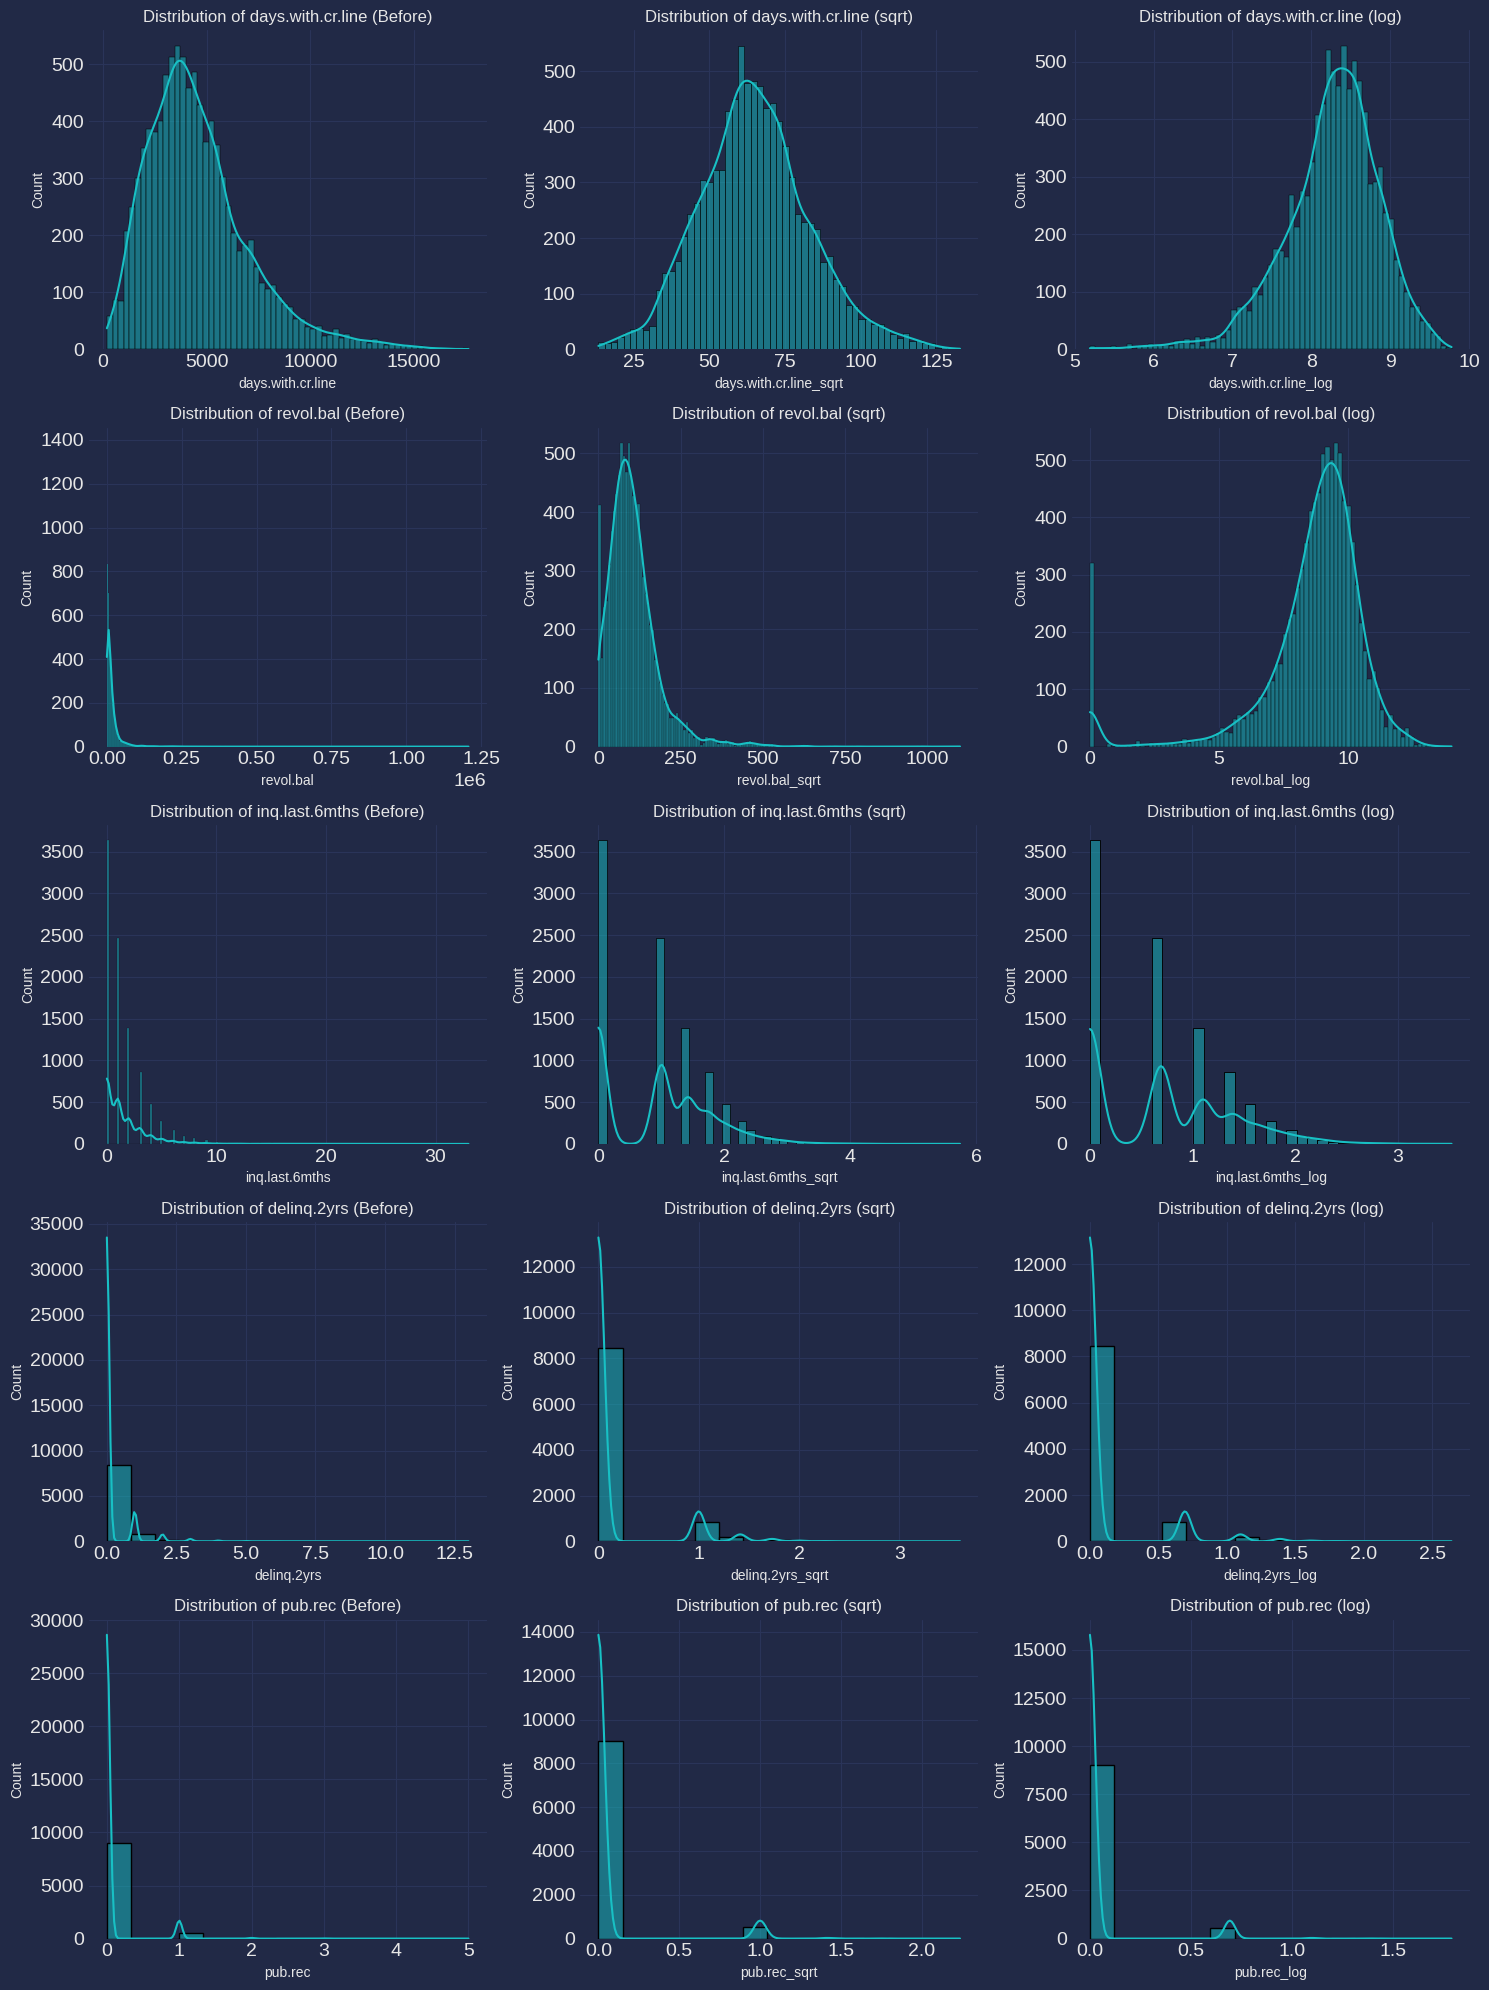

In [30]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, column in enumerate(columns_to_transform):
    sns.histplot(data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} (Before)')

    sns.histplot(data[f'{column}_sqrt'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {column} (sqrt)')

    sns.histplot(data[f'{column}_log'], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribution of {column} (log)')

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 We can conclude that applying the square root transformation is an effective method for normalizing highly skewed features.
</div>

In [31]:
# drop redundunt columns
data = data.drop(['days.with.cr.line', 'days.with.cr.line_log',
                  'revol.bal', 'revol.bal_log',
                  'inq.last.6mths', 'inq.last.6mths_log',
                  'delinq.2yrs', 'delinq.2yrs_log',
                  'pub.rec', 'pub.rec_log'], axis=1)

<a id='9'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Label Encoding 🔤</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [32]:
data['credit.policy'] = data['credit.policy'].map({'Yes': 1, 'No': 0})
data['not.fully.paid'] = data['not.fully.paid'].map({'Yes': 1, 'No': 0})

# using pd.get_dummies for other feature
data = pd.get_dummies(data, drop_first=True)

<a id='10'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Train Test Split  🚂🛤️</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [33]:
X = data.drop(['not.fully.paid'], axis=1)
y = data.loc[:, 'not.fully.paid'].values

In [34]:
# Split Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (7662, 18) (7662,)
Testing set shape (X, y): (1916, 18) (1916,)


<a id='11'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Outlier Detection 🚨</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 In this section (<b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Outlier Handling</mark></b>), we first identify features containing outliers. After detecting these outliers, we will address them to improve the overall data quality.
</div>

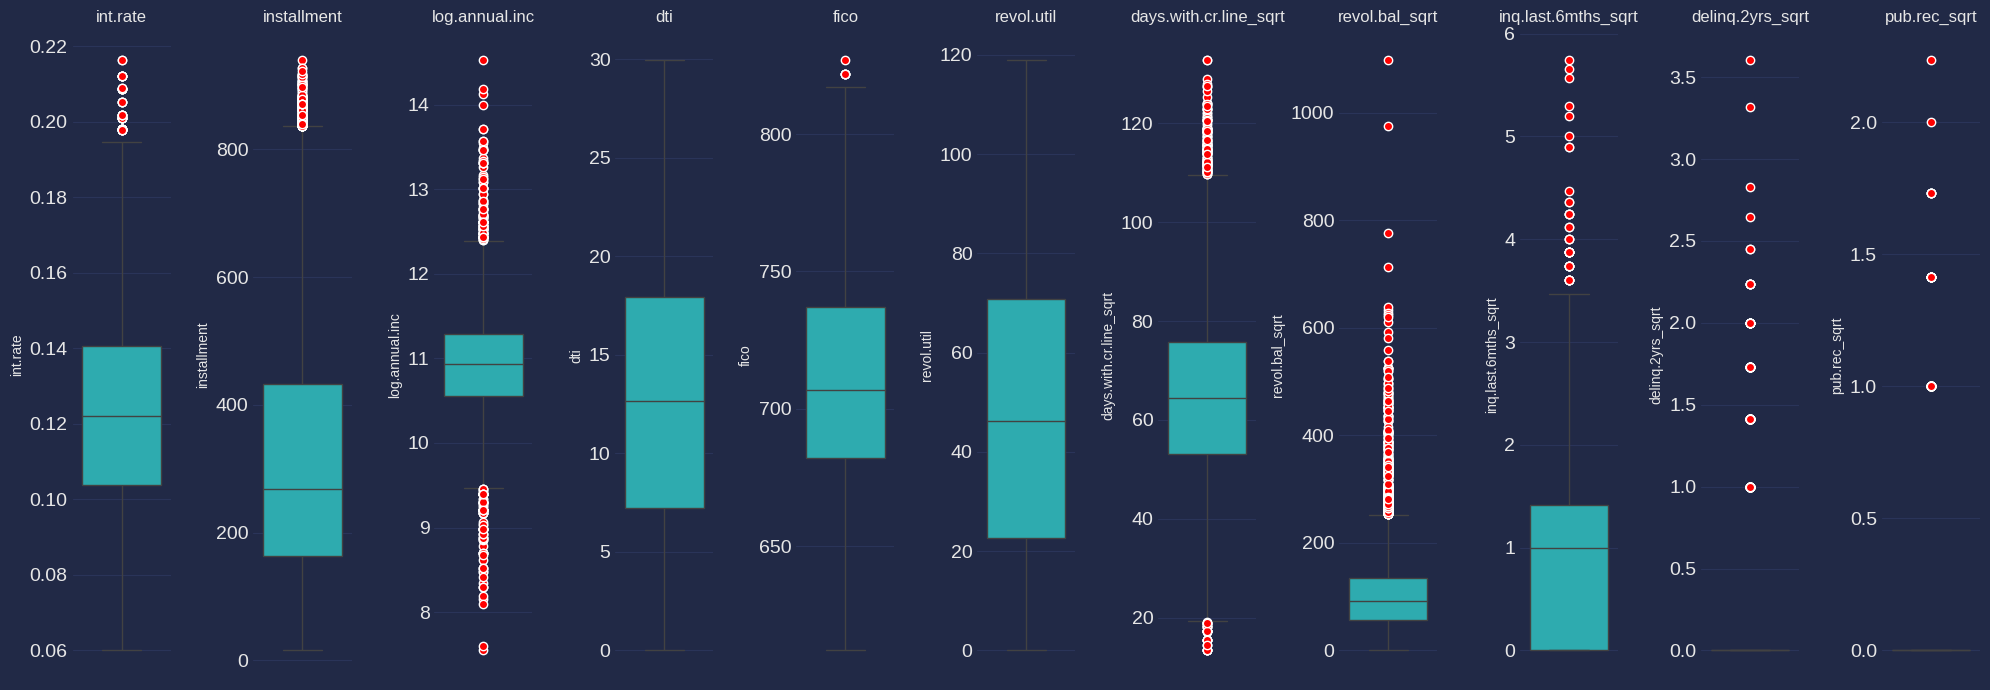

In [35]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

numerical_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.util',
                     'days.with.cr.line_sqrt', 'revol.bal_sqrt', 'inq.last.6mths_sqrt', 'delinq.2yrs_sqrt', 'pub.rec_sqrt']

# Create boxplots for numerical columns
num_plots = len(numerical_columns)

fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(20, 7))

for index, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[index], flierprops=red_circle)
    axes[index].set_ylabel(col)
    axes[index].set_title(col)

plt.tight_layout()
plt.show()


In [36]:
# outlier data
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [37]:
outlier_detection = data[numerical_columns]
for k, v in outlier_detection.items():
        outliers = find_outliers_IQR(v)
        perc = len(find_outliers_IQR(v)) * 100.0 / np.shape(outlier_detection)[0]
        print(f'Column :{k}')
        print(f"Number of Outliers = {len(outliers)}","||",f"Max Outlier Value = {outliers.max()}",
              "||", f"Min Outlier Value = {outliers.min()}", "||", f"Percentage of Outliers = {perc:.2f}%")
        print("\n")

Column :int.rate
Number of Outliers = 51 || Max Outlier Value = 0.2164 || Min Outlier Value = 0.1979 || Percentage of Outliers = 0.53%


Column :installment
Number of Outliers = 236 || Max Outlier Value = 940.14 || Min Outlier Value = 836.51 || Percentage of Outliers = 2.46%


Column :log.annual.inc
Number of Outliers = 238 || Max Outlier Value = 14.52835448 || Min Outlier Value = 7.547501683 || Percentage of Outliers = 2.48%


Column :dti
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :fico
Number of Outliers = 6 || Max Outlier Value = 827 || Min Outlier Value = 822 || Percentage of Outliers = 0.06%


Column :revol.util
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :days.with.cr.line_sqrt
Number of Outliers = 180 || Max Outlier Value = 132.81550485541965 || Min Outlier Value = 13.377530911943355 || Percentage of Outliers = 1.88%


Column :r

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 Based on the results from the two sections above, all features except 'dti' and 'revol.util' contain outliers. However, we will not handle the outliers in the 'delinq.2yrs_sqrt' and 'pub.rec_sqrt' columns because these features have specific or low unique values. This decision ensures we retain meaningful information despite the presence of outliers.
</div>

In [38]:
# Anomaly Detection
'''
# First method: Isolation Forests
ifor = IsolationForest(random_state=42,
                       contamination=0.05, warm_start=True)
y_train_pred = ifor.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]
#--------------------------------------------------------------

# Second method: Local Outlier Factor
LOF = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_train_pred = LOF.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]
#--------------------------------------------------------------

# third method: Elliptic
EE = EllipticEnvelope(contamination=0.05, random_state=42)
y_train_pred = EE.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]
#--------------------------------------------------------------

# fourth method: One Class Support Vector Machine
ocsvm = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
y_train_pred = ocsvm.fit_predict(X_train)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train, y_train = X_train[mask], y_train[mask]
'''

"\n# First method: Isolation Forests\nifor = IsolationForest(random_state=42,\n                       contamination=0.05, warm_start=True)\ny_train_pred = ifor.fit_predict(X_train)\n\n# removing outliers(select only the normal data)\nmask =y_train_pred !=-1\nX_train, y_train = X_train[mask], y_train[mask]\n#--------------------------------------------------------------\n\n# Second method: Local Outlier Factor\nLOF = LocalOutlierFactor(n_neighbors=20, contamination='auto')\ny_train_pred = LOF.fit_predict(X_train)\n\n# removing outliers(select only the normal data)\nmask =y_train_pred !=-1\nX_train, y_train = X_train[mask], y_train[mask]\n#--------------------------------------------------------------\n\n# third method: Elliptic\nEE = EllipticEnvelope(contamination=0.05, random_state=42)\ny_train_pred = EE.fit_predict(X_train)\n\n# removing outliers(select only the normal data)\nmask =y_train_pred !=-1\nX_train, y_train = X_train[mask], y_train[mask]\n#-----------------------------------

In [39]:
def handle_outliers(X_train, X_test, columns):
    for col in columns:
        Q1 = np.percentile(X_train[col], 25)
        Q3 = np.percentile(X_train[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Handling outliers in X_train
        X_train[col] = np.where(X_train[col] < lower_bound, lower_bound, X_train[col])
        X_train[col] = np.where(X_train[col] > upper_bound, upper_bound, X_train[col])

        # Handling outliers in X_test based on X_train IQR
        X_test[col] = np.where(X_test[col] < lower_bound, lower_bound, X_test[col])
        X_test[col] = np.where(X_test[col] > upper_bound, upper_bound, X_test[col])

    return X_train, X_test


# Define the columns to apply outlier handling
columns_to_handle = ['int.rate', 'installment', 'log.annual.inc', 'fico',
                     'days.with.cr.line_sqrt', 'revol.bal_sqrt', 'inq.last.6mths_sqrt']

# Apply the function to the specified columns
X_train, X_test = handle_outliers(X_train, X_test, columns_to_handle)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 In this notebook, we explored various techniques to handle outliers. After testing several methods, we decided to replace outliers with the upper and lower bounds using the IQR method. This approach yielded better accuracy compared to the other techniques. 📈✨
</div>

<a id='12'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Scaling 📏</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [40]:
# first method
# Identify numerical columns
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.util',
                  'days.with.cr.line_sqrt', 'revol.bal_sqrt', 'inq.last.6mths_sqrt', 'delinq.2yrs_sqrt', 'pub.rec_sqrt']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [41]:
'''
# second method
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''

'\n# second method\nscaler = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n'

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 In this section (<b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Scaling</mark></b>), we decided to use the Standard Scaler for the numeric features. 📏⚖️
</div>

<a id='13'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Handling Imbalanced label⚖️</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 As observed in the EDA section, the dataset's labels are imbalanced. Addressing this challenge is crucial for achieving better results, particularly in terms of the F1-score. Among various methods, we decided to implement the SMOTETomek technique to handle the imbalance.
</div>

In [42]:
# Count the values of y_train
y_train_counts = pd.Series(y_train).value_counts()

print("Counts of each class in y_train:")
print(y_train_counts)

Counts of each class in y_train:
0    6434
1    1228
Name: count, dtype: int64


In [43]:
'''
# first method: SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE on training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

# Check the class distribution after resampling
y_train_resampled_counts = pd.Series(y_train_resampled).value_counts()
print("Counts of each class in y_train_resampled:")
print(y_train_resampled_counts)
'''

'\n# first method: SMOTE\nsm = SMOTE(random_state=42)\n\n# Fit SMOTE on training data\nX_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)\n\n# Check the shape of the resampled data\nprint("Shape of X_train_resampled:", X_train_resampled.shape)\nprint("Shape of y_train_resampled:", y_train_resampled.shape)\n\n# Check the class distribution after resampling\ny_train_resampled_counts = pd.Series(y_train_resampled).value_counts()\nprint("Counts of each class in y_train_resampled:")\nprint(y_train_resampled_counts)\n'

In [44]:
# second method: SMOTETomek

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print('Resampled training set shape:\n', pd.Series(y_train_resampled).value_counts())

Resampled training set shape:
 0    6411
1    6411
Name: count, dtype: int64


<a id='14'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> ML Models⚡</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 In this section, we apply the following algorithms to the preprocessed data:
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Logistic Regression</mark></b></li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">KNN</mark></b></li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Naive Bayes</mark></b></li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Support Vector Machine</mark></b></li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Random Forest</mark></b></li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">XGBoost</mark></b></li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">LightGBM</mark></b></li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">CatBoost</mark></b></li>
    </ol>
    After implementing these methods, we will compare the evaluation results of each algorithm. 📊 Next, we will plot the feature importance. 🌟 In the following step, we will explore ensemble methods such as the Stacking Classifier and Bagging Classifier to further improve our model performance. 🚀
</div>

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Optuna for Hyperparameter Optimization</mark></b>
    <p>Optuna is an open-source, hyperparameter optimization framework designed to automate the search for optimal hyperparameters in machine learning models. It uses a state-of-the-art algorithm to efficiently sample hyperparameter configurations and identify the best performing ones.</p>
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Key Features of Optuna:</mark></b>
    <ul>
        <li><b>Automatic Hyperparameter Tuning</b>: Optuna automates the trial-and-error process of hyperparameter tuning, making it more efficient and less time-consuming.</li>
        <li><b>Dynamic Search Spaces</b>: It allows the definition of complex search spaces and adapts the search dynamically based on trial outcomes.</li>
        <li><b>Pruning</b>: Optuna includes pruning functionality to terminate unpromising trials early, saving computational resources.</li>
        <li><b>Integration with Popular Libraries</b>: It seamlessly integrates with machine learning libraries such as Scikit-learn, XGBoost, LightGBM, and more.</li>
    </ul>
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">How Optuna Works</mark></b> 🎯:
    <ol>
        <li><b>Define the Objective Function</b>: The objective function evaluates the model performance given a set of hyperparameters.</li>
        <li><b>Create a Study</b>: A study object is created to manage the optimization process.</li>
        <li><b>Sampling</b>: Optuna uses advanced sampling methods, such as TPE (Tree-structured Parzen Estimator), to suggest hyperparameter values.</li>
        <li><b>Pruning Unpromising Trials</b>: It prunes unpromising trials early to focus on more promising hyperparameter configurations.</li>
        <li><b>Optimization</b>: The study continues until it finds the best hyperparameters based on the defined objective function.</li>
    </ol>
</div>

<a id='15'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Evaluation Function📊</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [45]:
def train_and_evaluate(model_class, best_params, X_train, y_train, X_test, y_test):
    # Initialize and train the model
    model = model_class(**best_params)
    model.fit(X_train, y_train)

    # Predict on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate metrics
    train_score = model.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1_micro = f1_score(y_test, y_test_pred, average='micro')
    test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    test_classification_report = classification_report(y_test, y_test_pred)

    # Print results
    print(f"Model: {model_class.__name__}")
    print("-" * 30)
    print(f"Train Score: {train_score:.2f}")
    print("-" * 30)
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print("-" * 30)
    print(f"Test Precision (macro): {test_precision:.2f}")
    print(f"Test Recall (macro): {test_recall:.2f}")
    print(f"Test F1 Score (micro): {test_f1_micro:.2f}")
    print(f"Test F1 Score (macro): {test_f1_macro:.2f}")
    print("-" * 30)
    print(f"Confusion Matrix:\n{test_confusion_matrix}")
    print("-" * 30)
    print(f"Classification Report:\n{test_classification_report}")

    return {
        "train_score": train_score,
        "test_accuracy": test_accuracy,
        "test_precision": test_precision,
        "test_recall": test_recall,
        "test_f1_micro": test_f1_micro,
        "test_f1_macro": test_f1_macro,
        "test_confusion_matrix": test_confusion_matrix,
        "test_classification_report": test_classification_report
    }

In [46]:
def evaluate_model(y_test, y_pred):
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='macro')
    test_recall = recall_score(y_test, y_pred, average='macro')
    test_f1_micro = f1_score(y_test, y_pred, average='micro')
    test_f1_macro = f1_score(y_test, y_pred, average='macro')
    test_confusion_matrix = confusion_matrix(y_test, y_pred)
    test_classification_report = classification_report(y_test, y_pred)

    # Print results
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print("-" * 30)
    print(f"Test Precision (macro): {test_precision:.2f}")
    print(f"Test Recall (macro): {test_recall:.2f}")
    print(f"Test F1 Score (micro): {test_f1_micro:.2f}")
    print(f"Test F1 Score (macro): {test_f1_macro:.2f}")
    print("-" * 30)
    print(f"Confusion Matrix:\n{test_confusion_matrix}")
    print("-" * 30)
    print(f"Classification Report:\n{test_classification_report}")

    return {
        "test_accuracy": test_accuracy,
        "test_precision": test_precision,
        "test_recall": test_recall,
        "test_f1_micro": test_f1_micro,
        "test_f1_macro": test_f1_macro,
        "test_confusion_matrix": test_confusion_matrix,
        "test_classification_report": test_classification_report
    }

<a id='16'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Logistic Regression 🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def objective_lr(trial):
    # Define the hyperparameters to be optimized
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', 'none'])
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

    # Ensure the combination of solver and penalty is valid
    if penalty == 'elasticnet' and solver != 'saga':
        raise optuna.exceptions.TrialPruned()
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'none' and solver in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()

    C = trial.suggest_loguniform('C', 1e-6, 1e2)
    l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1) if penalty == 'elasticnet' else None

    # Define the logistic regression model
    if penalty == 'none':
        model = LogisticRegression(penalty=penalty, solver=solver, max_iter=10000)
    else:
        model = LogisticRegression(penalty=penalty, solver=solver, C=C, l1_ratio=l1_ratio, max_iter=10000)

    # Fit the model and evaluate it
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

# Create a study object and optimize the objective function
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100)

# Print the best hyperparameters
print("Best parameters for Logistic Regression: ", study_lr.best_params)

[I 2024-05-23 15:12:03,841] A new study created in memory with name: no-name-ef5182c5-b8fc-4762-a8d3-2b5d94228a72
[I 2024-05-23 15:12:04,392] Trial 0 finished with value: 0.5474611342535871 and parameters: {'penalty': 'none', 'solver': 'sag', 'C': 6.130038556383891}. Best is trial 0 with value: 0.5474611342535871.
[I 2024-05-23 15:12:04,889] Trial 1 finished with value: 0.5478496101112611 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 12.405834925696372, 'l1_ratio': 0.7070101510112753}. Best is trial 1 with value: 0.5478496101112611.
[I 2024-05-23 15:12:05,110] Trial 2 finished with value: 0.5474611342535871 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 94.56880905598135}. Best is trial 1 with value: 0.5478496101112611.
[I 2024-05-23 15:12:05,276] Trial 3 finished with value: 0.5474611342535871 and parameters: {'penalty': 'none', 'solver': 'lbfgs', 'C': 2.68851576666427e-06}. Best is trial 1 with value: 0.5478496101112611.
[I 2024-05-23 15:12:05,285] Trial 

Best parameters for Logistic Regression:  {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.009322945781060268}


In [ ]:
# lr_best_params = study_lr.best_params
lr_best_params = {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.009322945781060268, 'max_iter':10000}
lr_results = train_and_evaluate(LogisticRegression, lr_best_params, X_train_resampled, y_train_resampled, X_test, y_test)

Model: LogisticRegression
------------------------------
Train Score: 0.64
------------------------------
Test Accuracy: 0.65
------------------------------
Test Precision (macro): 0.58
Test Recall (macro): 0.64
Test F1 Score (micro): 0.65
Test F1 Score (macro): 0.56
------------------------------
Confusion Matrix:
[[1059  552]
 [ 116  189]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1611
           1       0.26      0.62      0.36       305

    accuracy                           0.65      1916
   macro avg       0.58      0.64      0.56      1916
weighted avg       0.80      0.65      0.70      1916



<a id='17'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> KNN 🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    p = trial.suggest_int('p', 1, 5)  # Typical values for p are 1 (Manhattan) and 2 (Euclidean)

    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)
print("Best parameters for KNN: ", study_knn.best_params)

[I 2024-05-18 07:26:01,469] A new study created in memory with name: no-name-359a8dc0-c065-45f5-8442-982e0d0b1823
[I 2024-05-18 07:26:13,380] Trial 0 finished with value: 0.5172793251068386 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 4}. Best is trial 0 with value: 0.5172793251068386.
[I 2024-05-18 07:26:13,845] Trial 1 finished with value: 0.5309000240326844 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'algorithm': 'brute', 'p': 2}. Best is trial 1 with value: 0.5309000240326844.
[I 2024-05-18 07:26:15,086] Trial 2 finished with value: 0.5212361730406448 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 2}. Best is trial 1 with value: 0.5309000240326844.
[I 2024-05-18 07:26:15,359] Trial 3 finished with value: 0.5218847366555346 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'brute', 'p': 2}. Best is trial 1 with value: 0.5309000240326844.
[I 2024-05-18 07:26:26,961] T

Best parameters for KNN:  {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'brute', 'p': 1}


In [ ]:
# knn_best_params = study_knn.best_params
knn_best_params = {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'brute', 'p': 1}
knn_results = train_and_evaluate(KNeighborsClassifier, knn_best_params, X_train_resampled, y_train_resampled, X_test, y_test)

Model: KNeighborsClassifier
------------------------------
Train Score: 0.94
------------------------------
Test Accuracy: 0.70
------------------------------
Test Precision (macro): 0.54
Test Recall (macro): 0.56
Test F1 Score (micro): 0.70
Test F1 Score (macro): 0.54
------------------------------
Confusion Matrix:
[[1244  367]
 [ 200  105]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1611
           1       0.22      0.34      0.27       305

    accuracy                           0.70      1916
   macro avg       0.54      0.56      0.54      1916
weighted avg       0.76      0.70      0.73      1916



<a id='18'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Naive Bayes🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def objective_gnb(trial):
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-11, 1e-1)

    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

study_gnb = optuna.create_study(direction='maximize')
study_gnb.optimize(objective_gnb, n_trials=100)
print("Best parameters for Gaussian Naive Bayes: ", study_gnb.best_params)


[I 2024-05-18 10:30:52,038] A new study created in memory with name: no-name-f1a1a923-9d08-4aca-9587-fabf3475267a
[I 2024-05-18 10:30:52,123] Trial 0 finished with value: 0.5710812000010292 and parameters: {'var_smoothing': 0.019405701717679167}. Best is trial 0 with value: 0.5710812000010292.
[I 2024-05-18 10:30:52,152] Trial 1 finished with value: 0.5720522244106481 and parameters: {'var_smoothing': 0.031476936383300964}. Best is trial 1 with value: 0.5720522244106481.
[I 2024-05-18 10:30:52,181] Trial 2 finished with value: 0.5742642527064254 and parameters: {'var_smoothing': 0.03053171352574516}. Best is trial 2 with value: 0.5742642527064254.
[I 2024-05-18 10:30:52,211] Trial 3 finished with value: 0.5684326747437437 and parameters: {'var_smoothing': 0.00023312412158653769}. Best is trial 2 with value: 0.5742642527064254.
[I 2024-05-18 10:30:52,240] Trial 4 finished with value: 0.5684326747437437 and parameters: {'var_smoothing': 3.2665707526206293e-08}. Best is trial 2 with value

Best parameters for Gaussian Naive Bayes:  {'var_smoothing': 0.044710251022100356}


In [54]:
# gnb_best_params = study_gnb.best_params
gnb_best_params = {'var_smoothing': 0.044710251022100356}
gnb_results = train_and_evaluate(GaussianNB, gnb_best_params, X_train_resampled, y_train_resampled, X_test, y_test)

Model: GaussianNB
------------------------------
Train Score: 0.63
------------------------------
Test Accuracy: 0.69
------------------------------
Test Precision (macro): 0.58
Test Recall (macro): 0.63
Test F1 Score (micro): 0.69
Test F1 Score (macro): 0.58
------------------------------
Confusion Matrix:
[[1152  459]
 [ 136  169]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.72      0.79      1611
         1.0       0.27      0.55      0.36       305

    accuracy                           0.69      1916
   macro avg       0.58      0.63      0.58      1916
weighted avg       0.79      0.69      0.73      1916



<a id='19'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Support Vector Machine🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def objective_svm(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)
print("Best parameters for SVM: ", study_svm.best_params)

[I 2024-05-18 07:51:46,754] A new study created in memory with name: no-name-e510b4c7-109f-4576-9e78-639f5c5615a1
[I 2024-05-18 07:52:09,582] Trial 0 finished with value: 0.58793977624191 and parameters: {'C': 2.7735122833965415, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: 0.58793977624191.
[I 2024-05-18 07:52:31,535] Trial 1 finished with value: 0.5281883193033139 and parameters: {'C': 26.414879063133277, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.58793977624191.
[I 2024-05-18 07:52:41,886] Trial 2 finished with value: 0.5482903771911638 and parameters: {'C': 0.0023900466967162097, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 0 with value: 0.58793977624191.
[I 2024-05-18 07:54:43,200] Trial 3 finished with value: 0.588193097913013 and parameters: {'C': 43.984983455033294, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 3 with value: 0.588193097913013.
[I 2024-05-18 07:55:03,467] Trial 4 finished with value: 0.5307546918674297 and 

Best parameters for SVM:  {'C': 0.5785008921766731, 'kernel': 'linear', 'gamma': 'auto'}


In [55]:
# svm_best_params = study_svm.best_params
svm_best_params = {'C': 0.5785008921766731, 'kernel': 'linear', 'gamma': 'auto'}
svm_results = train_and_evaluate(SVC, svm_best_params, X_train_resampled, y_train_resampled, X_test, y_test)

Model: SVC
------------------------------
Train Score: 0.65
------------------------------
Test Accuracy: 0.71
------------------------------
Test Precision (macro): 0.59
Test Recall (macro): 0.63
Test F1 Score (micro): 0.71
Test F1 Score (macro): 0.59
------------------------------
Confusion Matrix:
[[1205  406]
 [ 146  159]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81      1611
         1.0       0.28      0.52      0.37       305

    accuracy                           0.71      1916
   macro avg       0.59      0.63      0.59      1916
weighted avg       0.79      0.71      0.74      1916



<a id='20'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Random Forest🌲</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)
print("Best parameters for RF: ", study_rf.best_params)


[I 2024-05-18 08:18:44,809] A new study created in memory with name: no-name-cfbac4fe-c776-47be-a937-7a8b07f290dc
[I 2024-05-18 08:18:54,436] Trial 0 finished with value: 0.564739792194652 and parameters: {'n_estimators': 278, 'max_depth': 25, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.564739792194652.
[I 2024-05-18 08:18:57,980] Trial 1 finished with value: 0.5680578617760281 and parameters: {'n_estimators': 232, 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.5680578617760281.
[I 2024-05-18 08:19:09,622] Trial 2 finished with value: 0.5599177376579904 and parameters: {'n_estimators': 352, 'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.5680578617760281.
[I 2024-05-18 08:19:14,393] Trial 3 finished with value: 0.5636042087211275 and parameters: {'n_estimators': 349, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 7}. Best is trial 1 with value

Best parameters for RF:  {'n_estimators': 298, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 6}


In [ ]:
# rf_best_params = study_rf.best_params
rf_best_params = {'n_estimators': 298, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 6}
rf_results = train_and_evaluate(RandomForestClassifier, rf_best_params, X_train_resampled, y_train_resampled, X_test, y_test)

Model: RandomForestClassifier
------------------------------
Train Score: 0.84
------------------------------
Test Accuracy: 0.74
------------------------------
Test Precision (macro): 0.58
Test Recall (macro): 0.60
Test F1 Score (micro): 0.74
Test F1 Score (macro): 0.58
------------------------------
Confusion Matrix:
[[1294  317]
 [ 184  121]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1611
           1       0.28      0.40      0.33       305

    accuracy                           0.74      1916
   macro avg       0.58      0.60      0.58      1916
weighted avg       0.78      0.74      0.76      1916



<a id='21'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> XGBoost🚀</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def objective_xgb(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'mlogloss',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 15)
    }

    model = xgb.XGBClassifier(**param, use_label_encoder=False)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)
print("Best parameters for XGBoost: ", study_xgb.best_params)

[I 2024-05-18 10:56:42,521] A new study created in memory with name: no-name-eb0b6907-2637-4cb7-9498-30cc22c1c0e9
[I 2024-05-18 10:56:43,033] Trial 0 finished with value: 0.5096782945975445 and parameters: {'booster': 'gblinear', 'lambda': 6.102618247903045e-08, 'alpha': 1.7702250529669987e-08, 'subsample': 0.5721584844892407, 'colsample_bytree': 0.8335842946267711, 'learning_rate': 0.0011487882784923073, 'n_estimators': 223, 'max_depth': 14}. Best is trial 0 with value: 0.5096782945975445.
[I 2024-05-18 10:56:50,572] Trial 1 finished with value: 0.5506278751248788 and parameters: {'booster': 'gbtree', 'lambda': 0.3872420991904911, 'alpha': 1.652311832087763e-07, 'subsample': 0.9489669145265631, 'colsample_bytree': 0.9512318627324001, 'learning_rate': 0.009667685485748671, 'n_estimators': 152, 'max_depth': 14}. Best is trial 1 with value: 0.5506278751248788.
[I 2024-05-18 10:56:51,269] Trial 2 finished with value: 0.5313019489505308 and parameters: {'booster': 'gbtree', 'lambda': 2.346

Best parameters for XGBoost:  {'booster': 'gbtree', 'lambda': 4.331354939860899e-07, 'alpha': 0.004854718673750019, 'subsample': 0.7132398590209026, 'colsample_bytree': 0.7977505668064595, 'learning_rate': 2.54773857044299e-07, 'n_estimators': 304, 'max_depth': 6}


In [56]:
# xgb_best_params = study_xgb.best_params
xgb_best_params = {'booster': 'gbtree', 'lambda': 4.331354939860899e-07, 'alpha': 0.004854718673750019,
                   'subsample': 0.7132398590209026, 'colsample_bytree': 0.7977505668064595,
                   'learning_rate': 2.54773857044299e-07, 'n_estimators': 304, 'max_depth': 6}
xgb_results = train_and_evaluate(xgb.XGBClassifier, xgb_best_params, X_train_resampled, y_train_resampled, X_test, y_test)

Model: XGBClassifier
------------------------------
Train Score: 0.75
------------------------------
Test Accuracy: 0.75
------------------------------
Test Precision (macro): 0.59
Test Recall (macro): 0.62
Test F1 Score (micro): 0.75
Test F1 Score (macro): 0.60
------------------------------
Confusion Matrix:
[[1307  304]
 [ 175  130]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85      1611
         1.0       0.30      0.43      0.35       305

    accuracy                           0.75      1916
   macro avg       0.59      0.62      0.60      1916
weighted avg       0.79      0.75      0.77      1916



<a id='22'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> LightGBM🚀</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def objective_lgb(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 64),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    }

    model = lgb.LGBMClassifier(**param)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=50)
print("Best parameters for LightGBM: ", study_lgb.best_params)

[I 2024-05-18 07:44:12,046] A new study created in memory with name: no-name-f8cd2f6c-4f88-43ab-a5da-a751649f767f


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:44:19,165] Trial 0 finished with value: 0.575248845199297 and parameters: {'boosting_type': 'dart', 'num_leaves': 66, 'max_depth': 55, 'learning_rate': 1.7840686247480211e-07, 'n_estimators': 160, 'min_child_samples': 18, 'subsample': 0.5083158925571117, 'colsample_bytree': 0.8952992873522949}. Best is trial 0 with value: 0.575248845199297.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:44:22,306] Trial 1 finished with value: 0.5699055833825997 and parameters: {'boosting_type': 'dart', 'num_leaves': 129, 'max_depth': 29, 'learning_rate': 0.0009037221768351265, 'n_estimators': 158, 'min_child_samples': 59, 'subsample': 0.6055784121576195, 'colsample_bytree': 0.867586583770819}. Best is trial 0 with value: 0.575248845199297.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-05-18 07:44:24,529] Trial 2 finished with value: 0.5522168803418803 and parameters: {'boosting_type': 'goss', 'num_leaves': 241, 'max_depth': 16, 'learning_rate': 4.1161038404072085e-05, 'n_estimators': 203, 'min_child_samples': 43, 'subsample': 0.82718876853648, 'colsample_bytree': 0.6646595162004247}. Best is trial 0 with value: 0.575248845199297.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[Li

[I 2024-05-18 07:44:27,772] Trial 3 finished with value: 0.556247278656328 and parameters: {'boosting_type': 'goss', 'num_leaves': 168, 'max_depth': 0, 'learning_rate': 3.543165154811009e-08, 'n_estimators': 311, 'min_child_samples': 40, 'subsample': 0.8203992156027371, 'colsample_bytree': 0.782713379201512}. Best is trial 0 with value: 0.575248845199297.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[Li

[I 2024-05-18 07:44:28,876] Trial 4 finished with value: 0.5534243548957228 and parameters: {'boosting_type': 'goss', 'num_leaves': 140, 'max_depth': 27, 'learning_rate': 1.6403386927514224e-05, 'n_estimators': 85, 'min_child_samples': 9, 'subsample': 0.7849111833769181, 'colsample_bytree': 0.7645645985328908}. Best is trial 0 with value: 0.575248845199297.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[Li

[I 2024-05-18 07:44:29,302] Trial 5 finished with value: 0.5842877652674487 and parameters: {'boosting_type': 'goss', 'num_leaves': 3, 'max_depth': 35, 'learning_rate': 0.0011386907680578057, 'n_estimators': 192, 'min_child_samples': 6, 'subsample': 0.5221849543328383, 'colsample_bytree': 0.9062906279589096}. Best is trial 5 with value: 0.5842877652674487.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:44:33,688] Trial 6 finished with value: 0.5422952639076399 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 127, 'max_depth': -1, 'learning_rate': 4.173902946121135e-06, 'n_estimators': 431, 'min_child_samples': 16, 'subsample': 0.813612228600626, 'colsample_bytree': 0.5669619643200905}. Best is trial 5 with value: 0.5842877652674487.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2024-05-18 07:44:35,038] Trial 7 finished with value: 0.5661231884057971 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 172, 'max_depth': 34, 'learning_rate': 1.0743957407697443e-08, 'n_estimators': 79, 'min_child_samples': 73, 'subsample': 0.9470312720556784, 'colsample_bytree': 0.6424969600529487}. Best is trial 5 with value: 0.5842877652674487.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-05-18 07:44:36,979] Trial 8 finished with value: 0.5700833637580625 and parameters: {'boosting_type': 'goss', 'num_leaves': 157, 'max_depth': 61, 'learning_rate': 1.8677137371618462e-07, 'n_estimators': 115, 'min_child_samples': 96, 'subsample': 0.6446487049561078, 'colsample_bytree': 0.7140012053461662}. Best is trial 5 with value: 0.5842877652674487.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with 

[I 2024-05-18 07:44:46,974] Trial 9 finished with value: 0.5496114491907869 and parameters: {'boosting_type': 'goss', 'num_leaves': 255, 'max_depth': 25, 'learning_rate': 7.184509640399182e-07, 'n_estimators': 388, 'min_child_samples': 46, 'subsample': 0.8958339449364845, 'colsample_bytree': 0.9309656090729423}. Best is trial 5 with value: 0.5842877652674487.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:44:49,955] Trial 10 finished with value: 0.527142715914514 and parameters: {'boosting_type': 'dart', 'num_leaves': 5, 'max_depth': 45, 'learning_rate': 0.686646314747275, 'n_estimators': 272, 'min_child_samples': 30, 'subsample': 0.5034430921330527, 'colsample_bytree': 0.9932322312631028}. Best is trial 5 with value: 0.5842877652674487.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:44:54,710] Trial 11 finished with value: 0.5976076336574898 and parameters: {'boosting_type': 'dart', 'num_leaves': 8, 'max_depth': 64, 'learning_rate': 0.0021141875482517257, 'n_estimators': 232, 'min_child_samples': 5, 'subsample': 0.5306279774992745, 'colsample_bytree': 0.8664582018590371}. Best is trial 11 with value: 0.5976076336574898.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:45:00,578] Trial 12 finished with value: 0.5984553360227995 and parameters: {'boosting_type': 'dart', 'num_leaves': 12, 'max_depth': 45, 'learning_rate': 0.0029261023635519393, 'n_estimators': 257, 'min_child_samples': 6, 'subsample': 0.645604910916511, 'colsample_bytree': 0.8323007000048995}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:45:17,927] Trial 13 finished with value: 0.5325935203420123 and parameters: {'boosting_type': 'dart', 'num_leaves': 47, 'max_depth': 49, 'learning_rate': 0.054124508099380395, 'n_estimators': 296, 'min_child_samples': 25, 'subsample': 0.6533161873101779, 'colsample_bytree': 0.799022144263284}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:45:36,977] Trial 14 finished with value: 0.5632457117918903 and parameters: {'boosting_type': 'dart', 'num_leaves': 59, 'max_depth': 64, 'learning_rate': 0.003586618139225031, 'n_estimators': 355, 'min_child_samples': 62, 'subsample': 0.720756683947945, 'colsample_bytree': 0.8319606840599668}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:45:58,703] Trial 15 finished with value: 0.5654791357413822 and parameters: {'boosting_type': 'dart', 'num_leaves': 38, 'max_depth': 44, 'learning_rate': 0.007123374452353569, 'n_estimators': 494, 'min_child_samples': 30, 'subsample': 0.5888664390088776, 'colsample_bytree': 0.9639404743806063}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:04,212] Trial 16 finished with value: 0.5716521350324167 and parameters: {'boosting_type': 'dart', 'num_leaves': 83, 'max_depth': 55, 'learning_rate': 0.0001680661366732461, 'n_estimators': 246, 'min_child_samples': 6, 'subsample': 0.6985787362830953, 'colsample_bytree': 0.8351156281924544}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:05,584] Trial 17 finished with value: 0.5323647667861318 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 97, 'max_depth': 42, 'learning_rate': 0.08353741106212641, 'n_estimators': 230, 'min_child_samples': 85, 'subsample': 0.5806804767255215, 'colsample_bytree': 0.7077226574932363}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:11,876] Trial 18 finished with value: 0.5351809427715244 and parameters: {'boosting_type': 'dart', 'num_leaves': 20, 'max_depth': 54, 'learning_rate': 0.046209655460332955, 'n_estimators': 344, 'min_child_samples': 19, 'subsample': 0.5663142883859619, 'colsample_bytree': 0.5060351315840899}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:28,119] Trial 19 finished with value: 0.5498322547063954 and parameters: {'boosting_type': 'dart', 'num_leaves': 209, 'max_depth': 19, 'learning_rate': 0.00024103517562304832, 'n_estimators': 259, 'min_child_samples': 34, 'subsample': 0.6495515400554152, 'colsample_bytree': 0.8479785882849165}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:30,316] Trial 20 finished with value: 0.5538165596504974 and parameters: {'boosting_type': 'dart', 'num_leaves': 31, 'max_depth': 39, 'learning_rate': 0.8385875112710232, 'n_estimators': 152, 'min_child_samples': 18, 'subsample': 0.6834521926921439, 'colsample_bytree': 0.9391284853176439}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 

[I 2024-05-18 07:46:31,754] Trial 21 finished with value: 0.5975023359216419 and parameters: {'boosting_type': 'goss', 'num_leaves': 7, 'max_depth': 34, 'learning_rate': 0.002293053417444204, 'n_estimators': 205, 'min_child_samples': 7, 'subsample': 0.5451726192833709, 'colsample_bytree': 0.9008277277650262}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[Li

[I 2024-05-18 07:46:33,935] Trial 22 finished with value: 0.5757127892771213 and parameters: {'boosting_type': 'goss', 'num_leaves': 22, 'max_depth': 50, 'learning_rate': 0.0102481611636585, 'n_estimators': 214, 'min_child_samples': 11, 'subsample': 0.5491732142721581, 'colsample_bytree': 0.8834186659349705}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:37,627] Trial 23 finished with value: 0.5728196681798096 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 81, 'max_depth': 18, 'learning_rate': 0.0007023339455097902, 'n_estimators': 317, 'min_child_samples': 5, 'subsample': 0.6143834314919163, 'colsample_bytree': 0.8076766440934144}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:39,050] Trial 24 finished with value: 0.5888661042613021 and parameters: {'boosting_type': 'dart', 'num_leaves': 6, 'max_depth': 8, 'learning_rate': 0.017371833416491372, 'n_estimators': 125, 'min_child_samples': 22, 'subsample': 0.5482596083674626, 'colsample_bytree': 0.7479404934667924}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:41,992] Trial 25 finished with value: 0.5600243565133032 and parameters: {'boosting_type': 'goss', 'num_leaves': 104, 'max_depth': 38, 'learning_rate': 0.0013981021176483466, 'n_estimators': 185, 'min_child_samples': 14, 'subsample': 0.7493487895740593, 'colsample_bytree': 0.989651418963113}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:46,352] Trial 26 finished with value: 0.5682060540592262 and parameters: {'boosting_type': 'dart', 'num_leaves': 51, 'max_depth': 60, 'learning_rate': 7.179441203016113e-05, 'n_estimators': 241, 'min_child_samples': 26, 'subsample': 0.6240115165390675, 'colsample_bytree': 0.9306567903534445}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:47,264] Trial 27 finished with value: 0.5843343229047728 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 27, 'max_depth': 24, 'learning_rate': 0.00032100143892539805, 'n_estimators': 291, 'min_child_samples': 35, 'subsample': 0.5319041492804595, 'colsample_bytree': 0.8670858637909963}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:53,834] Trial 28 finished with value: 0.5667966277440218 and parameters: {'boosting_type': 'dart', 'num_leaves': 78, 'max_depth': 48, 'learning_rate': 0.0023963669712406804, 'n_estimators': 266, 'min_child_samples': 51, 'subsample': 0.5703772860852993, 'colsample_bytree': 0.8076643837257916}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:55,629] Trial 29 finished with value: 0.5764545359904489 and parameters: {'boosting_type': 'goss', 'num_leaves': 61, 'max_depth': 58, 'learning_rate': 1.1582274797041328e-05, 'n_estimators': 177, 'min_child_samples': 13, 'subsample': 0.5106563642049429, 'colsample_bytree': 0.911588462193081}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:58,127] Trial 30 finished with value: 0.5267927099301652 and parameters: {'boosting_type': 'dart', 'num_leaves': 19, 'max_depth': 32, 'learning_rate': 0.10966549243435764, 'n_estimators': 222, 'min_child_samples': 22, 'subsample': 0.5012603374836989, 'colsample_bytree': 0.7302188325355337}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:58,651] Trial 31 finished with value: 0.5770915438762331 and parameters: {'boosting_type': 'dart', 'num_leaves': 5, 'max_depth': 10, 'learning_rate': 0.016481352478386203, 'n_estimators': 121, 'min_child_samples': 12, 'subsample': 0.5451351051188149, 'colsample_bytree': 0.7573156456426836}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:46:58,981] Trial 32 finished with value: 0.5467924393468396 and parameters: {'boosting_type': 'dart', 'num_leaves': 2, 'max_depth': 5, 'learning_rate': 0.020144769125871105, 'n_estimators': 132, 'min_child_samples': 5, 'subsample': 0.6073812419379028, 'colsample_bytree': 0.8770010280843661}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:00,733] Trial 33 finished with value: 0.5273949372552647 and parameters: {'boosting_type': 'dart', 'num_leaves': 41, 'max_depth': 12, 'learning_rate': 0.22351607853121327, 'n_estimators': 154, 'min_child_samples': 21, 'subsample': 0.5552038068030888, 'colsample_bytree': 0.8454916551447886}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:01,041] Trial 34 finished with value: 0.5914855158938521 and parameters: {'boosting_type': 'dart', 'num_leaves': 18, 'max_depth': 23, 'learning_rate': 0.0045576596952530395, 'n_estimators': 53, 'min_child_samples': 15, 'subsample': 0.6746366174883759, 'colsample_bytree': 0.6365930479203041}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:01,663] Trial 35 finished with value: 0.5771204620462046 and parameters: {'boosting_type': 'dart', 'num_leaves': 38, 'max_depth': 23, 'learning_rate': 0.0033601717481085485, 'n_estimators': 78, 'min_child_samples': 12, 'subsample': 0.6833412769658682, 'colsample_bytree': 0.6373884304121508}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:02,742] Trial 36 finished with value: 0.5884183027952996 and parameters: {'boosting_type': 'goss', 'num_leaves': 18, 'max_depth': 29, 'learning_rate': 0.0007149046182342302, 'n_estimators': 333, 'min_child_samples': 62, 'subsample': 0.7441432209058665, 'colsample_bytree': 0.5746856206307802}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[Li

[I 2024-05-18 07:47:03,240] Trial 37 finished with value: 0.5778362154875505 and parameters: {'boosting_type': 'goss', 'num_leaves': 66, 'max_depth': 38, 'learning_rate': 3.7729378475709226e-05, 'n_estimators': 63, 'min_child_samples': 9, 'subsample': 0.7125112505847955, 'colsample_bytree': 0.6799360778825646}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:05,680] Trial 38 finished with value: 0.5920897777187344 and parameters: {'boosting_type': 'dart', 'num_leaves': 29, 'max_depth': 30, 'learning_rate': 0.005576796599408257, 'n_estimators': 195, 'min_child_samples': 16, 'subsample': 0.7728707252572268, 'colsample_bytree': 0.9046876415403027}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:09,383] Trial 39 finished with value: 0.5468002750309793 and parameters: {'boosting_type': 'goss', 'num_leaves': 202, 'max_depth': 30, 'learning_rate': 0.0005412601090484879, 'n_estimators': 212, 'min_child_samples': 37, 'subsample': 0.7794941504909081, 'colsample_bytree': 0.9005088873342161}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:11,008] Trial 40 finished with value: 0.5669832587340531 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 122, 'max_depth': 34, 'learning_rate': 0.0018745618492885241, 'n_estimators': 190, 'min_child_samples': 9, 'subsample': 0.8496210163079099, 'colsample_bytree': 0.9584939582585907}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:12,902] Trial 41 finished with value: 0.5884816729639397 and parameters: {'boosting_type': 'dart', 'num_leaves': 31, 'max_depth': 21, 'learning_rate': 0.005408119694479705, 'n_estimators': 163, 'min_child_samples': 15, 'subsample': 0.7810298161737351, 'colsample_bytree': 0.5848486150294381}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:13,186] Trial 42 finished with value: 0.5886668706157653 and parameters: {'boosting_type': 'dart', 'num_leaves': 15, 'max_depth': 29, 'learning_rate': 0.03112332191569073, 'n_estimators': 51, 'min_child_samples': 27, 'subsample': 0.6621387497959113, 'colsample_bytree': 0.8588848628034346}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:14,341] Trial 43 finished with value: 0.5014269545257413 and parameters: {'boosting_type': 'dart', 'num_leaves': 50, 'max_depth': 26, 'learning_rate': 0.20327096679191203, 'n_estimators': 107, 'min_child_samples': 18, 'subsample': 0.8520072254394978, 'colsample_bytree': 0.7798256034347889}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:19,698] Trial 44 finished with value: 0.5879227087345644 and parameters: {'boosting_type': 'dart', 'num_leaves': 14, 'max_depth': 41, 'learning_rate': 0.008220341069709843, 'n_estimators': 388, 'min_child_samples': 43, 'subsample': 0.9939062228744789, 'colsample_bytree': 0.9086719169308839}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:26,576] Trial 45 finished with value: 0.5865516077393489 and parameters: {'boosting_type': 'dart', 'num_leaves': 32, 'max_depth': 15, 'learning_rate': 8.373591783002946e-05, 'n_estimators': 282, 'min_child_samples': 17, 'subsample': 0.629958629977737, 'colsample_bytree': 0.8874711511712006}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:28,541] Trial 46 finished with value: 0.5569349106664719 and parameters: {'boosting_type': 'goss', 'num_leaves': 68, 'max_depth': 36, 'learning_rate': 0.001516701081261582, 'n_estimators': 307, 'min_child_samples': 9, 'subsample': 0.5907058125929953, 'colsample_bytree': 0.6031116803569136}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:33,296] Trial 47 finished with value: 0.5667545930315051 and parameters: {'boosting_type': 'dart', 'num_leaves': 52, 'max_depth': 32, 'learning_rate': 0.00035938727613030267, 'n_estimators': 250, 'min_child_samples': 73, 'subsample': 0.729601930639817, 'colsample_bytree': 0.9612249090655725}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:34,936] Trial 48 finished with value: 0.5984553360227995 and parameters: {'boosting_type': 'dart', 'num_leaves': 11, 'max_depth': 52, 'learning_rate': 0.004056157323431914, 'n_estimators': 206, 'min_child_samples': 5, 'subsample': 0.6726830503937763, 'colsample_bytree': 0.82536219055103}. Best is trial 12 with value: 0.5984553360227995.


[LightGBM] [Info] Number of positive: 6411, number of negative: 6411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 12822, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-05-18 07:47:35,738] Trial 49 finished with value: 0.5797985427374244 and parameters: {'boosting_type': 'dart', 'num_leaves': 3, 'max_depth': 52, 'learning_rate': 2.9449741233984994e-06, 'n_estimators': 199, 'min_child_samples': 5, 'subsample': 0.8031651749718423, 'colsample_bytree': 0.8221989907672014}. Best is trial 12 with value: 0.5984553360227995.


Best parameters for LightGBM:  {'boosting_type': 'dart', 'num_leaves': 12, 'max_depth': 45, 'learning_rate': 0.0029261023635519393, 'n_estimators': 257, 'min_child_samples': 6, 'subsample': 0.645604910916511, 'colsample_bytree': 0.8323007000048995}


In [57]:
# lgb_best_params = study_lgb.best_params
lgb_best_params = {'boosting_type': 'dart', 'num_leaves': 12, 'max_depth': 45, 'learning_rate': 0.0029261023635519393,
                   'n_estimators': 257, 'min_child_samples': 6, 'subsample': 0.645604910916511,
                   'colsample_bytree': 0.8323007000048995, 'verbose':0}
lgb_results = train_and_evaluate(lgb.LGBMClassifier, lgb_best_params, X_train_resampled, y_train_resampled, X_test, y_test)

Model: LGBMClassifier
------------------------------
Train Score: 0.71
------------------------------
Test Accuracy: 0.75
------------------------------
Test Precision (macro): 0.59
Test Recall (macro): 0.62
Test F1 Score (micro): 0.75
Test F1 Score (macro): 0.60
------------------------------
Confusion Matrix:
[[1304  307]
 [ 174  131]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      1611
         1.0       0.30      0.43      0.35       305

    accuracy                           0.75      1916
   macro avg       0.59      0.62      0.60      1916
weighted avg       0.79      0.75      0.77      1916



<a id='23'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> CatBoost🚀</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def objective_cb(trial):
    param = {
        'depth': trial.suggest_int('depth', 4, 10),
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1.0),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'eval_metric': 'F1',
        'random_seed': 42,
        'logging_level': 'Silent'
    }

    model = CatBoostClassifier(**param)
    model.fit(X_train_resampled, y_train_resampled, eval_set=(X_test, y_test))
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1

study_cb = optuna.create_study(direction='maximize')
study_cb.optimize(objective_cb, n_trials=50)
print("Best parameters for CatBoost: ", study_cb.best_params)

[I 2024-05-18 10:37:38,735] A new study created in memory with name: no-name-1da95bb1-10f9-409e-81db-8fc2a6fc9665
[I 2024-05-18 10:37:45,926] Trial 0 finished with value: 0.5917525391173846 and parameters: {'depth': 6, 'iterations': 454, 'learning_rate': 0.009650639160219758, 'l2_leaf_reg': 0.3343035810391447, 'border_count': 193}. Best is trial 0 with value: 0.5917525391173846.
[I 2024-05-18 10:37:53,713] Trial 1 finished with value: 0.5931031969529611 and parameters: {'depth': 4, 'iterations': 673, 'learning_rate': 0.00011102353697863629, 'l2_leaf_reg': 0.44818067774491943, 'border_count': 232}. Best is trial 1 with value: 0.5931031969529611.
[I 2024-05-18 10:37:54,205] Trial 2 finished with value: 0.58753405102415 and parameters: {'depth': 5, 'iterations': 138, 'learning_rate': 0.0024526068496418226, 'l2_leaf_reg': 0.18899253893813442, 'border_count': 80}. Best is trial 1 with value: 0.5931031969529611.
[I 2024-05-18 10:37:58,693] Trial 3 finished with value: 0.5637781869295797 and 

Best parameters for CatBoost:  {'depth': 7, 'iterations': 741, 'learning_rate': 0.022451331042516204, 'l2_leaf_reg': 0.07421391263178219, 'border_count': 55}


In [ ]:
# cb_best_params = study_cb.best_params
cb_best_params = {'depth': 7, 'iterations': 741, 'learning_rate': 0.022451331042516204,
                  'l2_leaf_reg': 0.07421391263178219, 'border_count': 55, 'verbose':0}
cb_results = train_and_evaluate(CatBoostClassifier, cb_best_params, X_train_resampled, y_train_resampled, X_test, y_test)

Model: CatBoostClassifier
------------------------------
Train Score: 0.93
------------------------------
Test Accuracy: 0.83
------------------------------
Test Precision (macro): 0.63
Test Recall (macro): 0.55
Test F1 Score (micro): 0.83
Test F1 Score (macro): 0.55
------------------------------
Confusion Matrix:
[[1552   59]
 [ 266   39]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1611
           1       0.40      0.13      0.19       305

    accuracy                           0.83      1916
   macro avg       0.63      0.55      0.55      1916
weighted avg       0.78      0.83      0.79      1916



<a id='24'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Conclusion of ML models⚡</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
# Collect results for each model
results = {
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost', 'Gaussian Naive Bayes'],
    'Train Score': [
        lr_results['train_score'],
        knn_results['train_score'],
        svm_results['train_score'],
        rf_results['train_score'],
        xgb_results['train_score'],
        lgb_results['train_score'],
        cb_results['train_score'],
        gnb_results['train_score']
    ],
    'Test Accuracy': [
        lr_results['test_accuracy'],
        knn_results['test_accuracy'],
        svm_results['test_accuracy'],
        rf_results['test_accuracy'],
        xgb_results['test_accuracy'],
        lgb_results['test_accuracy'],
        cb_results['test_accuracy'],
        gnb_results['test_accuracy']
    ],
    'Test F1 Score (Macro)': [
        lr_results['test_f1_macro'],
        knn_results['test_f1_macro'],
        svm_results['test_f1_macro'],
        rf_results['test_f1_macro'],
        xgb_results['test_f1_macro'],
        lgb_results['test_f1_macro'],
        cb_results['test_f1_macro'],
        gnb_results['test_f1_macro']
    ],
    'Confusion Matrix': [
        lr_results['test_confusion_matrix'],
        knn_results['test_confusion_matrix'],
        svm_results['test_confusion_matrix'],
        rf_results['test_confusion_matrix'],
        xgb_results['test_confusion_matrix'],
        lgb_results['test_confusion_matrix'],
        cb_results['test_confusion_matrix'],
        gnb_results['test_confusion_matrix']
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)
results_df.round(3)

,Model,Train Score,Test Accuracy,Test F1 Score (Macro),Confusion Matrix
0,Logistic Regression,0.638,0.651,0.561,"[[1059, 552], [116, 189]]"
1,KNN,0.941,0.704,0.542,"[[1244, 367], [200, 105]]"
2,SVM,0.648,0.712,0.590,"[[1205, 406], [146, 159]]"
3,Random Forest,0.842,0.739,0.582,"[[1294, 317], [184, 121]]"
4,XGBoost,0.752,0.750,0.598,"[[1307, 304], [175, 130]]"
5,LightGBM,0.708,0.749,0.598,"[[1304, 307], [174, 131]]"
6,CatBoost,0.934,0.830,0.549,"[[1552, 59], [266, 39]]"
7,Gaussian Naive Bayes,0.626,0.689,0.579,"[[1152, 459], [136, 169]]"


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Model Performance Summary</mark></b> 🚀
    <ol>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Logistic Regression</mark></b>
            <ul>
                <li><b>Insights</b>: Decent performance with balanced F1-score and recall. Performs moderately well on the imbalanced dataset.</li>
            </ul>
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">KNN</mark></b>
            <ul>
                <li><b>Insights</b>: High training score indicates potential overfitting. The model struggles to balance precision and recall for the minority class.</li>
            </ul>
        </li>        
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">SVM</mark></b>
            <ul>
                <li><b>Insights</b>: Balanced performance with a relatively high F1-score and recall for the positive class.</li>
            </ul>
        </li>        
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Random Forest</mark></b>
            <ul>
                <li><b>Insights</b>: Good overall performance, but slightly lower F1-score compared to SVM. Handles imbalanced data reasonably well.</li>
            </ul>
        </li>        
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">XGBoost</mark></b>
            <ul>
                <li><b>Insights</b>: Balanced performance with a good F1-score and slightly higher recall for the positive class.</li>
            </ul>
        </li>        
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">LightGBM</mark></b>
            <ul>
                <li><b>Insights</b>: Very similar performance to XGBoost with good F1-score and recall.</li>
            </ul>
        </li>       
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">CatBoost</mark></b>
            <ul>
                <li><b>Insights</b>: High training score and test accuracy, but lower F1-score due to poor recall for the positive class, indicating overfitting.</li>
            </ul>
        </li>        
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Gaussian Naive Bayes</mark></b>
            <ul>
                <li><b>Insights</b>: Balanced performance with reasonable F1-score and recall for the positive class.</li>
            </ul>
        </li>
    </ol>
</div>


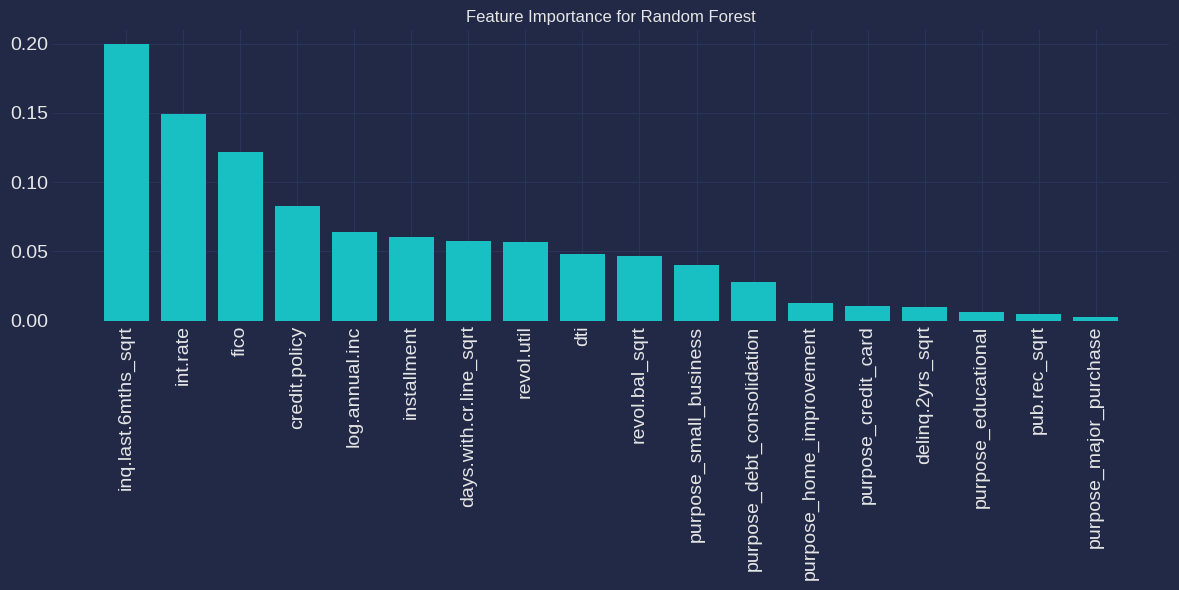

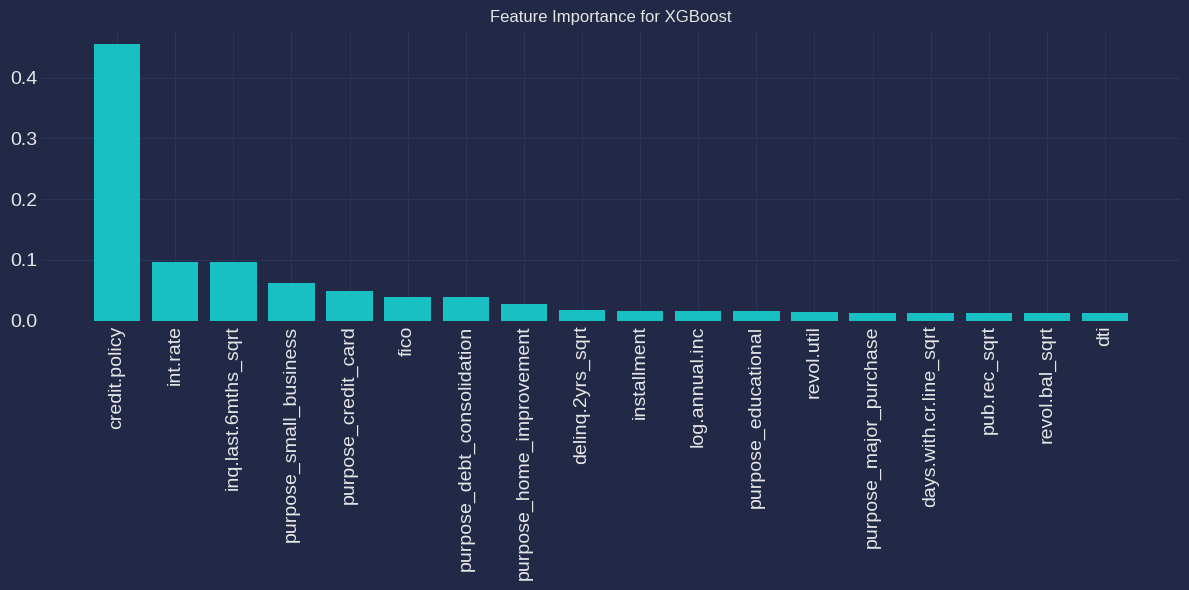

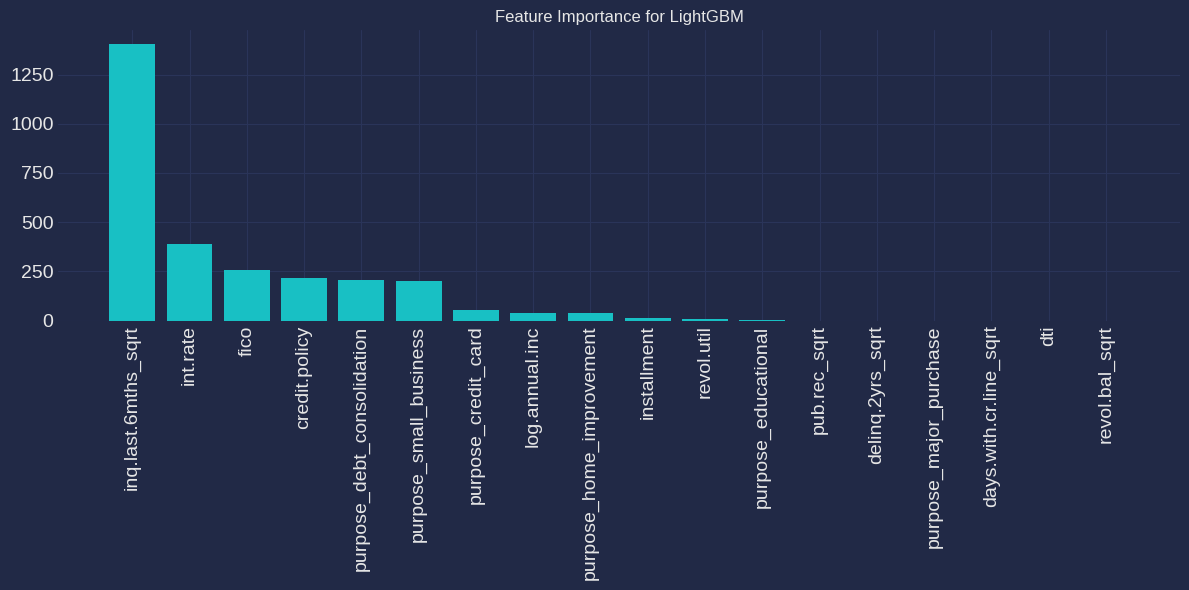

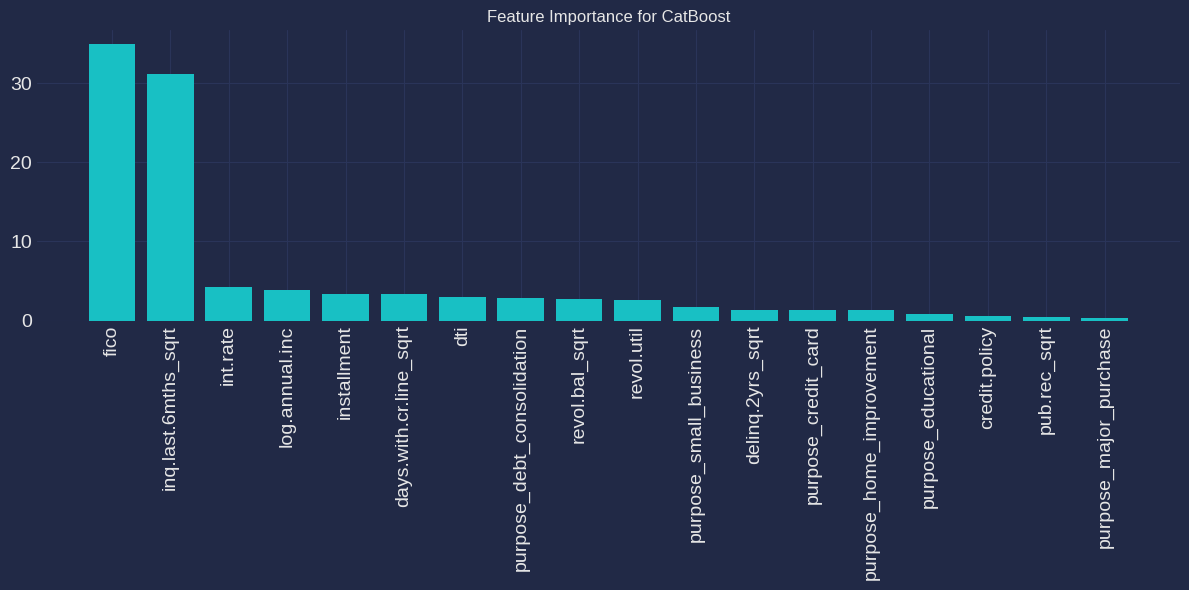

In [ ]:
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        raise ValueError(f"Model {model_name} does not have feature importance attribute.")

    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importance for {model_name}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage for Random Forest, XGBoost, LightGBM, and CatBoost
models = [
    RandomForestClassifier(**rf_best_params),
    xgb.XGBClassifier(**xgb_best_params, use_label_encoder=False),
    lgb.LGBMClassifier(**lgb_best_params),
    CatBoostClassifier(**cb_best_params)
]

model_names = ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']

# Fit models
for model in models:
    model.fit(X_train_resampled, y_train_resampled)

# Plot feature importance for each model
for model, name in zip(models, model_names):
    plot_feature_importance(model, name, X_train.columns)


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    Based on the previous code block, we plotted the feature importance for various classifiers. Here are the key insights:
    <ul>
        <li>In both Random Forest and LightGBM, the 'inq.last.6mths_sqrt' feature is the most important. However, some features show no importance in these classifiers.</li>
        <li>In the XGBoost classifier, which yielded the best results, 'credit.policy' stands out as the most important feature.</li>
        <li>For the CatBoost classifier, despite poor recall for the positive class, 'inq.last.6mths_sqrt' and 'fico' are the top features.</li>
    </ul>
    These insights highlight how different models prioritize different features, which can guide further feature engineering and model tuning. 📊🚀
</div>


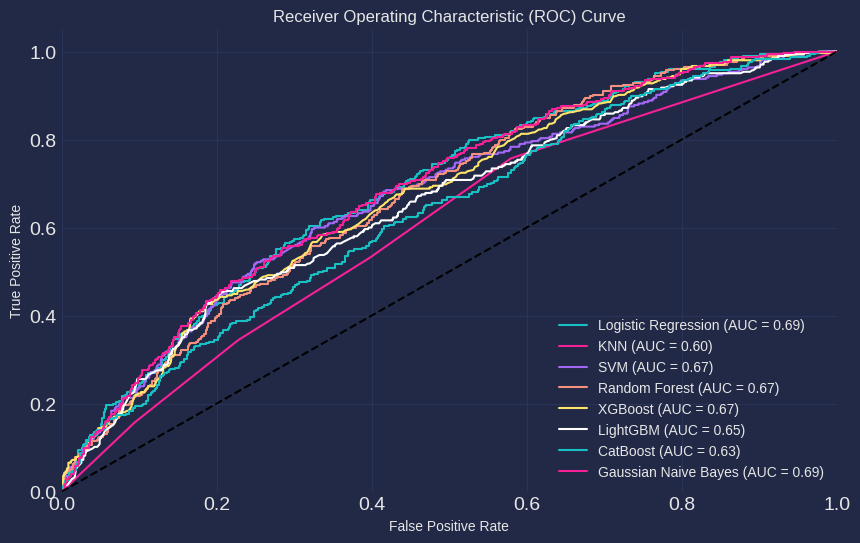

In [ ]:
def plot_roc_curves(models, model_names, X_test, y_test):
    plt.figure()

    for model, name in zip(models, model_names):
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
models = [
    LogisticRegression(**lr_best_params),
    KNeighborsClassifier(**knn_best_params),
    SVC(**svm_best_params, probability=True),
    RandomForestClassifier(**rf_best_params),
    xgb.XGBClassifier(**xgb_best_params, use_label_encoder=False),
    lgb.LGBMClassifier(**lgb_best_params),
    CatBoostClassifier(**cb_best_params),
    GaussianNB(**gnb_best_params)
]

model_names = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost', 'Gaussian Naive Bayes']

# Fit models
for model in models:
    model.fit(X_train_resampled, y_train_resampled)

# Plot ROC curves
plot_roc_curves(models, model_names, X_test, y_test)


<a id='25'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Ensemble ML Models ⚡</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    Based on the evaluation results, we have decided to use SVM, LightGBM, XGBoost, and Naive Bayes for our ensemble model with a stacking classifier. This selection aims to leverage the strengths of each algorithm to improve overall performance.🎯
</div>

<a id='26'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Stacking Classifier Overview🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    A stacking classifier is an ensemble learning technique that combines multiple machine learning models to improve predictive performance. Here's a concise description:
    <ul>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Architecture</mark></b>: It consists of two or more base models (level-0) and a meta-model (level-1).</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Process</mark></b>:
            <ol>
                <li><b>Training Base Models</b>: Train multiple diverse models on the training data.</li>
                <li><b>Generating Meta-Features</b>: Use the predictions of these base models to create a new dataset for the meta-model.</li>
                <li><b>Training Meta-Model</b>: Train a meta-model on these predictions to learn the best way to combine the base models' outputs.</li>
            </ol>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Advantages</mark></b>:
            <ul>
                <li><b>Improved Accuracy</b>: Combines strengths of different models.</li>
                <li><b>Robustness</b>: Reduces overfitting and variance.</li>
            </ul>
        </li>
    </ul>
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Illustration of Stacking Classifier</mark></b>
    <ol>
        <li><b>Base Models (Level-0)</b>:
            <ul>
                <li>Example: SVM, LightGBM, XGBoost, Naive Bayes</li>
            </ul>
        </li>
        <li><b>Meta-Model (Level-1)</b>:
            <ul>
                <li>Example: Logistic Regression or another strong model</li>
            </ul>
        </li>
    </ol>
</div>


<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Visual Representation</mark></b>
    <pre>
+------------------+
| Training Data    |
+--------+---------+
         |
         v
+--------+---------+
| Base Model 1     | ----+
+------------------+     |
                         v
+------------------+     +-------> New Training Data for Meta-Model
| Base Model 2     | ----+        (Predictions from Base Models)
+------------------+     |
                         v
+------------------+     |
| Base Model 3     | ----+
+------------------+     |
                         v
+------------------+     |
| Base Model n     | ----+
+------------------+

         |
         v
+------------------+
|   Meta-Model     |
+------------------+
         |
         v
+------------------+
| Final Prediction |
+------------------+
    </pre>
This diagram shows how base models feed their predictions into a meta-model, which then makes the final prediction. This process helps in capturing diverse patterns in the data, leading to better overall performance.
</div>

In [58]:
# Best models and parameters
models = [
    ('lightgbm', lgb.LGBMClassifier(**lgb_best_params)),
    ('SVM', SVC(**svm_best_params)),
    ('xgboost', xgb.XGBClassifier(**xgb_best_params)),
    ('naivebayes', GaussianNB(**gnb_best_params)),
]

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=models,
                                  final_estimator=GaussianNB(**gnb_best_params))

stacking_clf.fit(X_train_resampled, y_train_resampled)
y_pred = stacking_clf.predict(X_test)

In [59]:
Stacking_Classifier = evaluate_model(y_test, y_pred)

Test Accuracy: 0.70
------------------------------
Test Precision (macro): 0.58
Test Recall (macro): 0.63
Test F1 Score (micro): 0.70
Test F1 Score (macro): 0.59
------------------------------
Confusion Matrix:
[[1189  422]
 [ 144  161]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81      1611
         1.0       0.28      0.53      0.36       305

    accuracy                           0.70      1916
   macro avg       0.58      0.63      0.59      1916
weighted avg       0.79      0.70      0.74      1916



<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    Utilizing the stacking method, we observe improved <b>Recall 1</b> compared to LightGBM, SVM, and XGBoost. Furthermore, our approach yields superior <b>F1-score</b> results when compared to the Naive Bayes algorithm.
</div>

<a id='27'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> ANN Model🧠</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    Now, to achieve better results, we can apply a neural network to our dataset to see whether the score and recall for the positive class (recall 1) improve. 🚀🤖
    Neural networks, with their ability to capture complex patterns in data, may provide enhanced performance and more accurate predictions compared to traditional machine learning models. Let's explore this approach and analyze the outcomes! 📊✨
</div>

<a id='28'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Architecture🛠️</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [47]:
def create_model(input_dim):
    model = Sequential()

    # Input layer
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Hidden layer 1
    model.add(Dense(64, activation='relu', kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Hidden layer 2
    model.add(Dense(64, activation='relu', kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Hidden layer 3
    model.add(Dense(32, activation='relu', kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Hidden layer 4
    model.add(Dense(16, activation='relu', kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    # model.add(Dropout(0.1))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    return model

In [48]:
input_dim = X_train.shape[1]

# Define the metrics
metrics = [F1Score(average='macro', threshold=0.5, name="f1_score") , "binary_accuracy"]

# Define the optimizer and loss
optimizer = Adam(learning_rate=0.0001)
loss = BinaryCrossentropy()

# Create the model
model = create_model(input_dim)

# Compile the model
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2432      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Neural Network Model Description 🚀✨</mark></b>
    <p>To enhance our predictive performance, we applied a neural network to the dataset. Here's a concise overview of the model configuration:</p>
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Input Dimension</mark></b>: The model takes an input with dimensions matching the number of features in <code>X_train</code>.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Metrics</mark></b>:
            <ul>
                <li><b>F1 Score</b> (macro-averaged) to handle class imbalance.</li>
                <li><b>Binary Accuracy</b> for overall performance.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Optimizer and Loss</mark></b>:
            <ul>
                <li><b>Optimizer</b>: Adam with a learning rate of 0.0001.</li>
                <li><b>Loss Function</b>: Binary Crossentropy.</li>
            </ul>
        </li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Model Architecture</mark></b>: A Sequential neural network with multiple layers:
            <ul>
                <li><b>Dense Layers</b>: Several fully connected layers with ReLU activation.</li>
                <li><b>Batch Normalization</b>: Applied after each dense layer to stabilize learning.</li>
                <li><b>Dropout</b>: Regularization technique to prevent overfitting.</li>
            </ul>
        </li>
    </ol>
</div>


<a id='29'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Training Function🛠️</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Model Training Callbacks</mark></b>
    <ol>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">ReduceLROnPlateau</mark></b> 🛤️:
            <ul>
                <li><b>Purpose</b>: Adjust the learning rate when the validation loss plateaus.</li>
                <li><b>Configuration</b>: Monitors <code>val_loss</code> with a patience of 10 epochs. If no improvement is observed, the learning rate is reduced by a factor of 0.9, with a minimum learning rate set to <code>1e-6</code>.</li>
            </ul>
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">EarlyStopping</mark></b> ⏹️:
            <ul>
                <li><b>Purpose</b>: Halt training when the model stops improving to prevent overfitting.</li>
                <li><b>Configuration</b>: Monitors <code>val_loss</code> and stops training if no improvement is observed for 30 epochs. The best weights are restored to ensure the best-performing model is retained.</li>
            </ul>
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">ModelCheckpoint</mark></b> 💾:
            <ul>
                <li><b>Purpose</b>: Save the model at its best performance during training.</li>
                <li><b>Configuration</b>: Monitors <code>val_f1_score</code> and saves the model only when the F1 score on the validation set improves. The best model is saved to the specified <code>network_filepath</code>.</li>
            </ul>
        </li>
    </ol>
    These callbacks collectively help in dynamically adjusting the learning process, preventing overfitting, and ensuring that we save the best version of the model. 🚀
</div>


In [49]:
# Training phase
def train_network(network, x_training, y_training, x_validation, y_validation, n_epoch, batch_size, network_filepath):
    # Add callbacks
    rlrop = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.9, min_lr=1e-6)
    es = EarlyStopping(monitor='val_loss', mode='min', patience=30, restore_best_weights=True)
    mch = ModelCheckpoint(filepath= network_filepath,
                          monitor='val_f1_score',
                          mode='max',
                          save_best_only=True
                          )


    # Ask the user whether to apply class weights
    apply_class_weight = input("Do you want to apply class weight? (yes/no): ").strip().lower() == 'yes'
    class_weight = None

    if apply_class_weight:
        classes = np.unique(y_training)
        class_weight_values = compute_class_weight(class_weight='balanced', classes=classes, y=y_training)
        class_weight = dict(zip(classes, class_weight_values))
        print("Class weights:", class_weight)


    results = network.fit(x_training, y_training,
                              batch_size=batch_size,
                              epochs=n_epoch,
                              validation_data=(x_validation, y_validation),
                              class_weight=class_weight,
                              callbacks=[es, mch])

    tra_losses = results.history["loss"]
    tra_f1s =  results.history["f1_score"]
    val_losses =  results.history["val_loss"]
    val_f1s =  results.history["val_f1_score"]
    tra_accuracies = results.history["binary_accuracy"]
    val_accuracies =  results.history["val_binary_accuracy"]

        # Visualization of the learning curves
    fig = plt.figure(figsize=(10, 5))
    tra_loss_plt, = plt.plot(range(len(tra_losses)), tra_losses, 'b')
    tra_f1_plt, = plt.plot(range(len(tra_f1s)), tra_f1s, 'c')
    tra_acc_plt, = plt.plot(range(len(tra_accuracies)), tra_accuracies, 'g')

    val_loss_plt, = plt.plot(range(len(val_losses)), val_losses, 'm')
    val_f1_plt, = plt.plot(range(len(val_f1s)), val_f1s, 'r')
    val_acc_plt, = plt.plot(range(len(val_accuracies)), val_accuracies, 'y')
    plt.xlabel('epoch')
    plt.ylabel('metrics')
    plt.legend([tra_loss_plt, tra_f1_plt, tra_acc_plt, val_loss_plt, val_f1_plt, val_acc_plt],
                ['training loss', 'training F1 score', "training accuracy" , "validation loss" , 'validation F1 score' , "validation accuracy"],
               loc='center left', bbox_to_anchor=(1, 0.5))

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    To train the model, we have two options:
    <ol>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Option 1</mark></b>: Use <code>X_train</code> and <code>y_train</code> without resampling, but apply class weights to handle class imbalance.</li>
        <li><b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Option 2</mark></b>: Use resampled data to balance the classes without applying class weights.</li>
    </ol>
    We will implement both approaches and report their evaluation on the test data to determine which method yields better performance.
</div>


<a id='30'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Option1: Use Train Data Without Resampling and Use Class Weights During Training🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [50]:
# Ensure the training and validation data are NumPy arrays with correct data types
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_train_resampled = np.array(X_train_resampled , dtype=np.float32)
y_train_resampled = np.array(y_train_resampled, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

Do you want to apply class weight? (yes/no): yes
Class weights: {0.0: 0.5954305253341623, 1.0: 3.1197068403908794}
Epoch 1/100
240/240 [==============================] - 7s 10ms/step - loss: 0.8159 - f1_score: 0.2635 - binary_accuracy: 0.5309 - val_loss: 0.6870 - val_f1_score: 0.2797 - val_binary_accuracy: 0.5725
Epoch 2/100
240/240 [==============================] - 2s 8ms/step - loss: 0.7840 - f1_score: 0.2626 - binary_accuracy: 0.5249 - val_loss: 0.7089 - val_f1_score: 0.3040 - val_binary_accuracy: 0.5626
Epoch 3/100
240/240 [==============================] - 2s 9ms/step - loss: 0.7426 - f1_score: 0.2840 - binary_accuracy: 0.5406 - val_loss: 0.7051 - val_f1_score: 0.3054 - val_binary_accuracy: 0.5585
Epoch 4/100
240/240 [==============================] - 2s 9ms/step - loss: 0.7296 - f1_score: 0.2897 - binary_accuracy: 0.5470 - val_loss: 0.6988 - val_f1_score: 0.3173 - val_binary_accuracy: 0.5553
Epoch 5/100
240/240 [==============================] - 2s 10ms/step - loss: 0.7181 - f1_

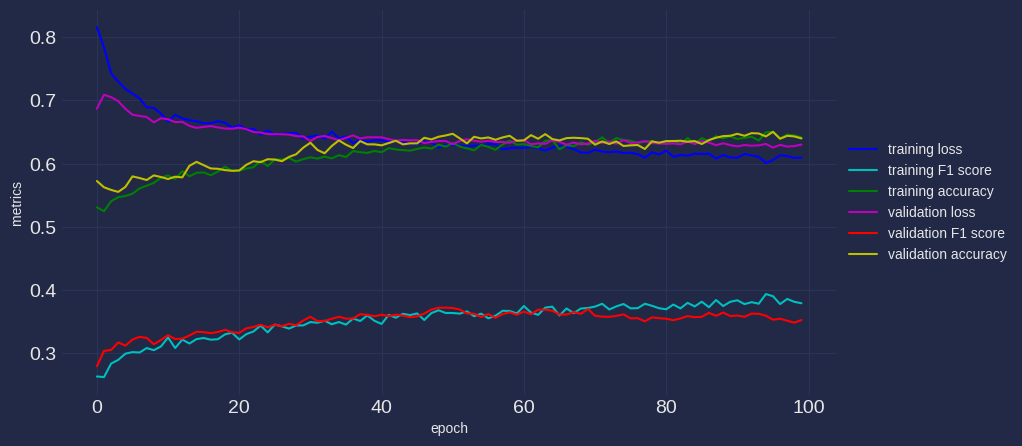

In [ ]:
train_network(model, X_train, y_train, X_test, y_test,
              n_epoch=100, batch_size=32, network_filepath='model_option_1.h5')

In [53]:
# Load the best model
best_model_option_1 = load_model('model_option_1.h5')

# Predict on the test set
pred_prob = best_model_option_1.predict(X_test)

# Convert probabilities to binary class labels with a threshold of 0.5
pred_labels = (pred_prob > 0.5).astype(int)

ANN_results_option_1 = evaluate_model(y_test, pred_labels)

60/60 [==============================] - 0s 2ms/step
Test Accuracy: 0.64
------------------------------
Test Precision (macro): 0.58
Test Recall (macro): 0.65
Test F1 Score (micro): 0.64
Test F1 Score (macro): 0.56
------------------------------
Confusion Matrix:
[[1033  578]
 [ 103  202]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.64      0.75      1611
         1.0       0.26      0.66      0.37       305

    accuracy                           0.64      1916
   macro avg       0.58      0.65      0.56      1916
weighted avg       0.81      0.64      0.69      1916



<a id='31'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;">  Option2: Resample Train Data and Train the Neural Network Without Using Class Weights🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

Do you want to apply class weight? (yes/no): no
Epoch 1/100
401/401 [==============================] - 11s 9ms/step - loss: 0.7323 - f1_score: 0.5452 - binary_accuracy: 0.5570 - val_loss: 0.6600 - val_f1_score: 0.3010 - val_binary_accuracy: 0.6122
Epoch 2/100
401/401 [==============================] - 4s 10ms/step - loss: 0.6845 - f1_score: 0.5863 - binary_accuracy: 0.5891 - val_loss: 0.6587 - val_f1_score: 0.3220 - val_binary_accuracy: 0.6133
Epoch 3/100
401/401 [==============================] - 3s 9ms/step - loss: 0.6706 - f1_score: 0.5937 - binary_accuracy: 0.5914 - val_loss: 0.6571 - val_f1_score: 0.3132 - val_binary_accuracy: 0.6018
Epoch 4/100
401/401 [==============================] - 3s 8ms/step - loss: 0.6637 - f1_score: 0.6043 - binary_accuracy: 0.6033 - val_loss: 0.6534 - val_f1_score: 0.3360 - val_binary_accuracy: 0.6059
Epoch 5/100
401/401 [==============================] - 3s 8ms/step - loss: 0.6558 - f1_score: 0.6160 - binary_accuracy: 0.6093 - val_loss: 0.6525 - val_f1

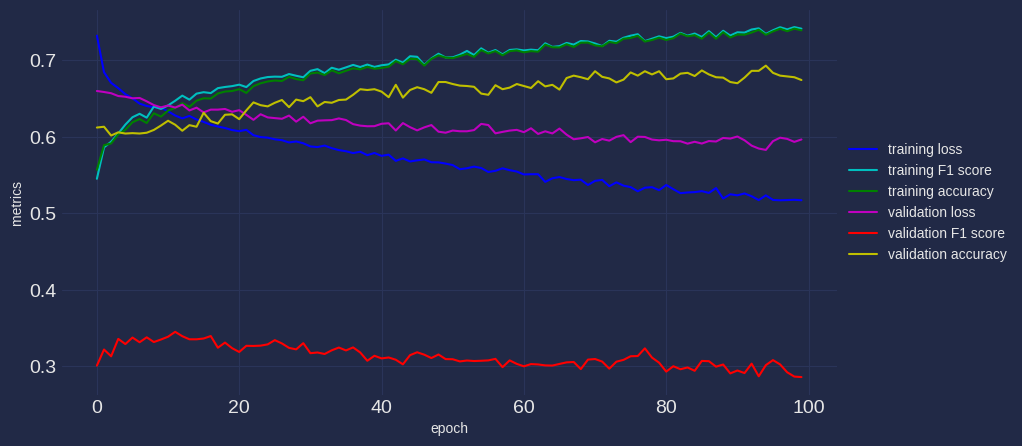

In [51]:
train_network(model, X_train_resampled, y_train_resampled, X_test, y_test,
              n_epoch=100, batch_size=32, network_filepath='model_option_2.h5')

In [52]:
# Load the best model
best_model_option_2 = load_model('model_option_2.h5')

# Predict on the test set
pred_prob = best_model_option_2.predict(X_test)

# Convert probabilities to binary class labels with a threshold of 0.5
pred_labels = (pred_prob > 0.5).astype(int)

ANN_results_option_2 = evaluate_model(y_test, pred_labels)

60/60 [==============================] - 1s 4ms/step
Test Accuracy: 0.62
------------------------------
Test Precision (macro): 0.57
Test Recall (macro): 0.62
Test F1 Score (micro): 0.62
Test F1 Score (macro): 0.54
------------------------------
Confusion Matrix:
[[986 625]
 [111 194]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.61      0.73      1611
         1.0       0.24      0.64      0.35       305

    accuracy                           0.62      1916
   macro avg       0.57      0.62      0.54      1916
weighted avg       0.79      0.62      0.67      1916



<a id='32'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Conclusion📈</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [60]:
# Collect results for each model
results = {
    'Model': ['Stacking Classifier', 'ANN_option_1', 'ANN_option_2'],
    'Test Accuracy': [
        Stacking_Classifier['test_accuracy'],
        ANN_results_option_1['test_accuracy'],
        ANN_results_option_2['test_accuracy']
    ],
    'Test F1 Score (Macro)': [
        Stacking_Classifier['test_f1_macro'],
        ANN_results_option_1['test_f1_macro'],
        ANN_results_option_2['test_f1_macro']
    ],
    'Confusion Matrix': [
        Stacking_Classifier['test_confusion_matrix'],
        ANN_results_option_1['test_confusion_matrix'],
        ANN_results_option_2['test_confusion_matrix']
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)
results_df.round(3)

,Model,Test Accuracy,Test F1 Score (Macro),Confusion Matrix
0,Stacking Classifier,0.705,0.585,"[[1189, 422], [144, 161]]"
1,ANN_option_1,0.645,0.562,"[[1033, 578], [103, 202]]"
2,ANN_option_2,0.616,0.537,"[[986, 625], [111, 194]]"


60/60 [==============================] - 0s 2ms/step


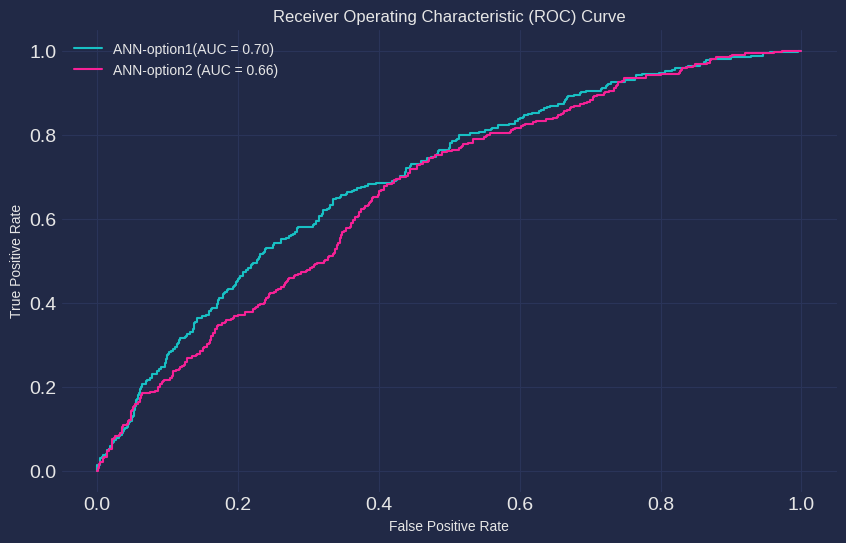

In [61]:
ann_prob_option_1 = best_model_option_1.predict(X_test).ravel()
ann_prob_option_2 = best_model_option_2.predict(X_test).ravel()

# Compute FPR and TPR for ANN
ann_fpr_1, ann_tpr_1, _ = roc_curve(y_test, ann_prob_option_1)
ann_fpr_2, ann_tpr_2, _ = roc_curve(y_test, ann_prob_option_2)

# Compute AUC for ANN
ann_auc_1 = auc(ann_fpr_1, ann_tpr_1)
ann_auc_2 = auc(ann_fpr_2, ann_tpr_2)


plt.plot(ann_fpr_1, ann_tpr_1, label='ANN-option1(AUC = {:.2f})'.format(ann_auc_1))
plt.plot(ann_fpr_2, ann_tpr_2, label='ANN-option2 (AUC = {:.2f})'.format(ann_auc_2))

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

<div style="border-radius: 10px; border: #4a6835 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    📝 <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights from Neural Network and Stacking Classifier Evaluation</mark></b>
    <br>
    <br>
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Model Performance Comparison</mark></b>
    <ol>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Stacking Classifier</mark></b>
            <ul>
                <li>
                    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights</mark></b>: The stacking classifier demonstrates a balanced performance with moderate accuracy and F1-score. It effectively combines multiple models to enhance predictive capabilities.
                </li>
            </ul>
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">ANN (Option 1)</mark></b>
            <ul>
                <li>
                    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights</mark></b>: Despite a lower F1-score, this option achieves the highest recall for the positive class, indicating better performance in identifying the minority class, which is crucial for imbalanced datasets.
                </li>
            </ul>
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">ANN (Option 2)</mark></b>
            <ul>
                <li>
                    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Insights</mark></b>: This option shows the lowest overall accuracy and F1-score among the evaluated models, suggesting that resampling alone may not be as effective in handling class imbalance as the class weights method used in Option 1.
                </li>
            </ul>
        </li>
    </ol>
    <br>
    <br>
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Key Takeaways</mark></b>
    <ul>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Balanced Performance</mark></b>: The <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Stacking Classifier</mark></b> provides a balanced approach with decent accuracy and F1-score, making it a reliable model for general use.
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Handling Imbalance</mark></b>: <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">ANN (Option 1)</mark></b>, which applies class weights without resampling, achieves the highest recall for the minority class. This is crucial for imbalanced datasets as it ensures more accurate identification of positive instances.
        </li>
        <li>
            <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Overall Performance</mark></b>: <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">ANN (Option 2)</mark></b>, shows the lowest performance in terms of both accuracy and F1-score, indicating that resampling may not be as effective as class weights in this context.
        </li>
    </ul>
    <br>
    <br>
    <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Recommended Approach</mark></b>: Given the focus on recall for the positive class due to the imbalanced nature of the dataset, <b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">ANN (Option 1)</mark></b> is recommended for its superior recall performance. For scenarios prioritizing overall model accuracy and performance, the<b><mark style="background-color:#4a6835;color:white;border-radius:5px;opacity:1.0">Stacking Classifier</mark></b> provides a balanced and reliable option. This dual approach ensures that model selection can be tailored based on specific requirements, whether prioritizing minority class identification or overall accuracy and performance. 🚀
</div>


# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;">Thanks for Your Attention🎉</span>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgKm-1C_IA227UFYXshCCQmJlLI0ci464uhDEM_YKCEA&s" alt="Loan Prediction">